In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('automobile_insurance_fraud.csv')
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape
# the shape of data with 1000 rows and 40 columns.

(1000, 40)

In [4]:
pd.set_option('display.max_columns', None)
df

# here below we can see the all 40 columns in the details.

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
# the column details which are given in the dataset :-

# 1.	months_as_customer: Number of months of patronage
# 2.	age: the length of time a customer has lived or a thing has existed
# 3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
# 4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
# 5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the
#       policy period
# 6.	policy_csl: is basically Combined Single Limit
# 7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
# 8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
# 9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of 
#       other policies
# 10.	insured_zip: It is the zip code where the insurance was made
# 11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided 
#       on the basis of their reproductive functions
# 12.	insured_education_level: This refers to the Level of education of the customer
# 13.	insured_occupation: This refers Occupation of the customer
# 14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
# 15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, 
#       living together but not married); or. in a civil partnership
# 16.	capital-gains: This refers to profit accrued due to insurance premium
# 17.	capital-loss: This refers to the losses incurred due to insurance claims
# 18.	incident_date: This refers to the date which claims where made by customers
# 19.	incident_type: This refers to the type of claim/vehicle damage made by customer
# 20.	collision_type: This refers to the area of damage on the vehicle
# 21.	incident_severity: This refers to the extent/level of damage
# 22.	authorities_contacted: This refers to the government agencies that were contacted after damage
# 23.	incident_state: This refers to the state at which the accident happened
# 24.	incident_city: This refers to the city at which the accident happened
# 25.	1ncident_location: This refers to the location at which the accident happened
# 26.	incident_hour_of_the_day: The period of the day which accident took place
# 27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
# 28.	property_damage: This refers to whether property was damaged or not
# 29.	bodily_injuries: This refers to injuries sustained
# 30.	witnesses: This refers to the number of witnesses involved
# 31.	police_report_available: This refers to whether the report on damage was documented or not
# 32.	total_claim_amount: This refers to the financial implications involved in claims
# 33.	injury_claim: This refers to physical injuries sustained
# 34.	property_claim: This refers to property damages during incident
# 35.	vehicle_claim: This refers to Vehicle damages during incident
# 36.	auto_make: This refers to the make of the vehicle
# 37.	auto_model: This refers to the model of the vehicle
# 38.	auto_year: This refers to the year which the vehicle was manufactured
# 39.	_c39:
# 40.	fraud_reported


In [6]:
df.columns
# all 40 column names

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.dtypes
# here in the following table we can see all three datatypes are present :
# 'int64', 'object' & 'float64'

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.info()
# here below we get the datatypes of all 40 columns : dtypes: float64(2), int64(17), object(21)
# Total number of rows : 1000
# there may be absence of null values, except column '_c39'- doubtful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

=======  CHECKING NULL VALUES =============

In [9]:
df.isnull().sum()

# here below we can find that there is no null vlaues are present in the dataset, except column '_c39'- it is showing all 1000..
# ..null values are present. so we have to analyse more that column.

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

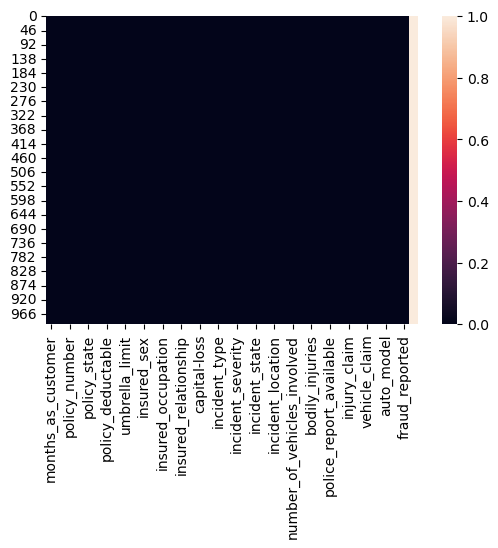

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

# with the help of heatmap also we can clearly seen absence of  NULL VALUES , in the following columns of dataset.

REMOVING IRRELEVANT COLUMN ================================

In [11]:
df['_c39']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64

In [12]:
df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [13]:
# in this above ['_c39'] column all values are NaN there is no such any value is present insdie the column.
# it seems to be irrelevant column in the dataset.
# so we can drop this irrelevnat column from our dataset.

In [14]:
df.drop(['_c39'], axis=1, inplace=True)
# the above mentioned column hasbeen deleted successfully

In [15]:
# Similarly the column "insured hobbies" & "Policy Number" is also seems to non-relevant column for the PREDICTING "FRAUD REPORTED"...
# so we can also drop "insured hobbies" column...

In [16]:
df.drop(['insured_hobbies'], axis=1, inplace=True)
# the above mentioned column hasbeen deleted successfully

In [17]:
df.drop(['policy_number'], axis=1, inplace=True)
# the above mentioned column hasbeen deleted successfully

In [18]:
df.drop(['policy_bind_date'], axis=1, inplace=True)
# the above mentioned column hasbeen deleted successfully

In [19]:
df.drop(['incident_date'], axis=1, inplace=True)

In [20]:
df.drop(['incident_location'], axis=1, inplace=True)
# here all the locations are different and having no relevance with 'fraud_reported' (no repeted location).
# the above mentioned column hasbeen deleted successfully

In [21]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [22]:
df.shape

# now there are thousand rows and 34 columns out of 40,  are present in the dataset.

(1000, 34)

In [23]:
df.isnull().sum()

# now there are no NULL / NAN values are present in the datset

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

<AxesSubplot:>

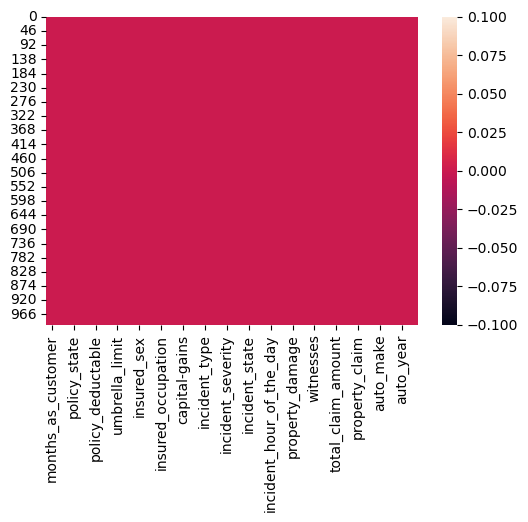

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())

# with the help of heatmap also we can clearly seen absence of  NULL VALUES , in the following columns of dataset.

UNIVARIATE ANALYSIS (Analysing each column individually) =================================================================

In [25]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
df.shape

(1000, 34)

In [27]:
df.head(1)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y


1)----Analysing Months_as_customer  ===>>>

In [28]:
# here we can analyse how many Old-customers & New-customers... 

In [29]:
df['months_as_customer'].nunique()
# out of 1000 rows there are 391 Number Of Unique values are present inside the dataset.

391

In [30]:
df['months_as_customer'].min()

0

In [31]:
df['months_as_customer'].max()
# 479 is the HIGHEST VLAUE of 'months_as_customer'
# that means the oldest customer of the company (as a duration period)

479

In [32]:
df['months_as_customer'].mean()
# the mean of all months duration of customers is = 203 months

203.954

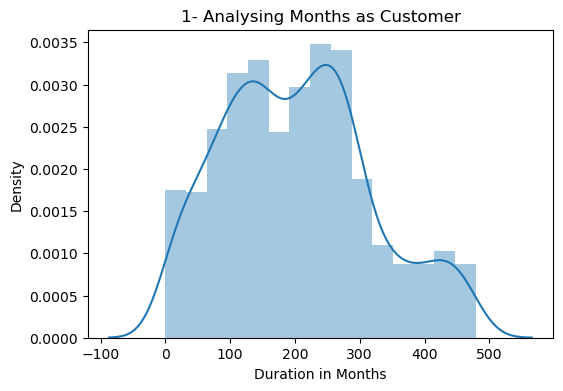

In [33]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('1- Analysing Months as Customer')
sns.distplot(df['months_as_customer'])
plt.xlabel('Duration in Months', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here in the below distplot, we can find that the density of maximum no. of cutomers is lying inbetween 80 - 280 months duration 
# the highest dnesity is near about 220 - 260 months.
# the maximum duration of months is above > 450

# conclusion = company having most of the customers connected from 100-250 months (8-20 years)
#              the most loyal customer is connected with the company since 479 months (39 years)


2)--- ANALYSING AGE OF CUSTOMERS ===>>>

In [34]:
df['age'].nunique()
# out of 1000 values , there are 46 unique values are there

46

In [35]:
df['age'].min()
# Minimum age of the customer is 19 years old

19

In [36]:
df['age'].max()
# the Maximum age of the customer is 64 years old

64

In [37]:
df['age'].mean()
# the mean or average age of the customers is 38 years old.

38.948

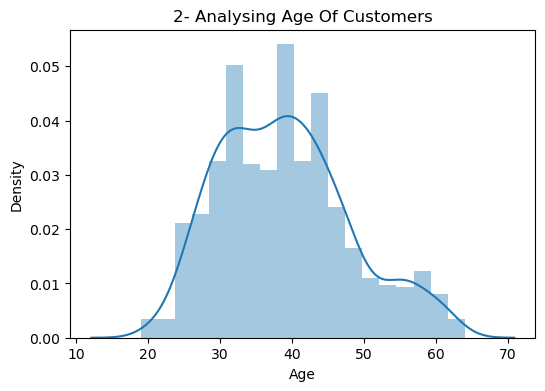

In [38]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('2- Analysing Age Of Customers')
sns.distplot(df['age'])
plt.xlabel('Age', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# most of the customers are having age in between 30-45 years old.
# minimum age =19 years
# Maximum age = 64 yers old
# data is 'RIGHTLY SKEWED' according to age,that means CUSTOMERS DEACRESES AS AGE INCREASING

3)---- Analysing Policy State ====>>

In [39]:
df['policy_state']

0      OH
1      IN
2      OH
3      IL
4      IL
       ..
995    OH
996    IL
997    OH
998    IL
999    OH
Name: policy_state, Length: 1000, dtype: object

In [40]:
df['policy_state'].unique()

# there are three unique values in this column i.e= OH, IN, IL...
# it might be - OH = Who insured ,  IN = Property are covered,  IL - Policy limit & period

array(['OH', 'IN', 'IL'], dtype=object)

In [41]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

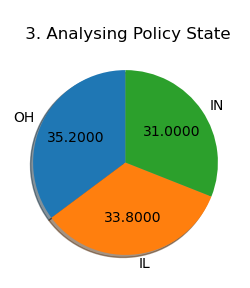

In [42]:
plt.figure(figsize=(3,3))
plt.title('\n 3. Analysing Policy State')
plt.pie(df['policy_state'].value_counts(),startangle=90,autopct='%.4f',labels=['OH', 'IL','IN'],shadow= True)
plt.show()

# OH - is having highest percentage of 35.2 %
# IL - is 33.8 %
# IN - is 31 %
# all three states are almost equally distributed.

4)----Analysing Annual Premium ====>>>

In [43]:
df['policy_annual_premium'].nunique()

# offcourse out of 1000 there are 991 unique values are there , because every customer is having different premium.

991

In [44]:
df['policy_annual_premium'].min()
# minimum premium is about 433

433.33

In [45]:
df['policy_annual_premium'].max()
# highest premium for the policy , paid by any cudtomer is 433

2047.59

In [46]:
df['policy_annual_premium'].mean()
# the mean or average of all policie premiums is 1256

1256.4061500000018

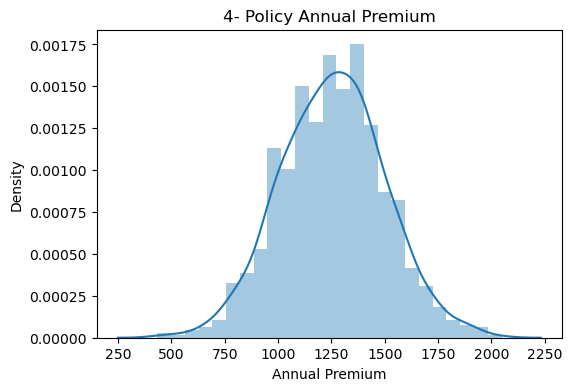

In [47]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('4- Policy Annual Premium')
sns.distplot(df['policy_annual_premium'])
plt.xlabel('Annual Premium', fontsize = 10)
plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here below we can find that the HIGHEST DENSITY is at the PREMIUM between 1100 - 1400
# that means the average pemium for the policy applied by the company is inbetween 1100-1400

5)---- Analysing Umbrella Limit =====>>>>

In [48]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [49]:
df['umbrella_limit'].nunique()
# there are 11 no.. of unique values are present inside the column

11

In [50]:
df['umbrella_limit'].min()
# i.e minimum umbrella limit taken by any customer, but it could be in positive, why it is in negative, must check

-1000000

In [51]:
df['umbrella_limit'].max()
# the highest umbrella limit taken by any customer is 1 Cr.

10000000

In [52]:
df['umbrella_limit'].value_counts()

# there are highest 798 customers has not taken UMBRELLA LIMIT for their policies.
# then 2nd highest 57 customers has taken = '60 lakh' umbrella limit
# then the count is further decreasign
# the HIGHEST UMBRELLA LIMIT taken by any customer is 1 Cr.
# there is 1 count of customer is at -10,00,000 , but why this value is in Negative it must be check

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

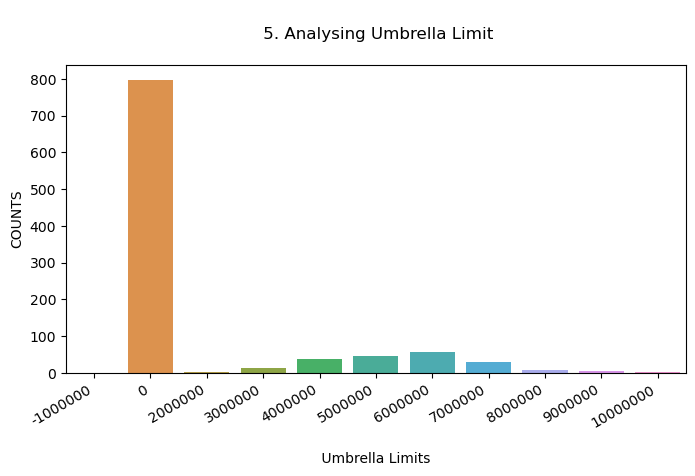

In [53]:
plt.figure (figsize = (8,4), facecolor = "white")
plt.title('\n 5. Analysing Umbrella Limit\n')
sns.countplot(x='umbrella_limit', data = df)
plt.xlabel('\n Umbrella Limits ', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# maximum number of customers has not taken any umbrella limit for their policies.
# only few customer has opt 60 lakh umbrella limit & then it further decreasing.

6) ----- Analysing Zip Codes =====>>

In [54]:
df['insured_zip'].nunique()
# there are 995 different zip codes are there out of 1000.
# that means customers are scattered from different cities.

995

7)---- Analysing Gender of Customers ===>>>

In [55]:
df['insured_sex'].nunique()
# offcourse there are two types of genders Male & Female. no Transgender is there.

2

In [56]:
df['insured_sex'].value_counts()

# its a intresting fact is there, FEMALE CUSTOMERS are more then Male customers.
# from this we can conclude that, FEMALE are more cotitious about CAR INSURANCE as comapred to MALE'S

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

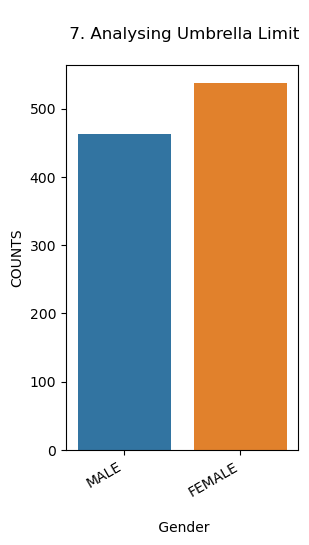

In [57]:
plt.figure (figsize = (3,5), facecolor = "white")
plt.title('\n 7. Analysing Umbrella Limit\n')
sns.countplot(x='insured_sex', data = df)
plt.xlabel('\n Gender', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

8) ----Analysing Occupation Of Customers =====>>>>

In [58]:
df['insured_occupation'].nunique()
# 14 no. of unique occupations are present in the column

14

In [59]:
df['insured_occupation'].value_counts()

# highest no. of customers are having occupation = 'machine-op-inspct'
# Lowest no. of customers from the = Farming & Fishing Field.
# CONCLUSION = from this we can conclude that RURAL AREAL PEOPLE are not much aware about CAR INSURANCE as compared to URBAN.

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

9) ----Analysing Relationship Of Customers ====>>

In [60]:
# RELATIONSHIP column is indicating the realation of the person (who is buying policie).. 
# ...with the person (for whom he/she is buying policie).
# that means policie buyer is different and policie holder is differet.

In [61]:
df['insured_relationship'].unique()

# the following are relationship categories present inside the column.

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [62]:
df['insured_relationship'].nunique()

# total 6 no. of unique relationships

6

In [63]:
df['insured_relationship'].value_counts()

# 'own-child' categorie is having highest no. = 183 (that means PARENTS are very cotatious about their childrens)
#                                                   and highest no. of Parents has purchased policie for their children
# then it is moveforward decreasing for other categories
# the least count is at 'Unmarried categorie' (that means unmarried people are very less contatious about car insurance)

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

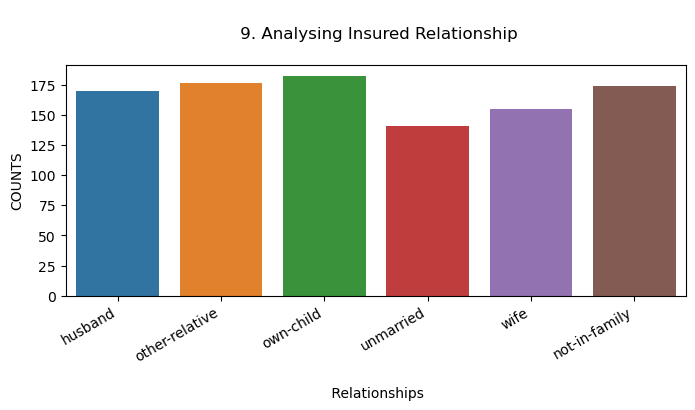

In [64]:
plt.figure (figsize = (8,3), facecolor = "white")
plt.title('\n 9. Analysing Insured Relationship\n')
sns.countplot(x='insured_relationship', data = df)
plt.xlabel('\n Relationships', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# here we can see the difference that i mentioned above.

10) ----Analysing Capital Gain ====>> (in simple word NO CLAIM BONUS) 

In [65]:
# Here in this cloumn we are going to analyse CAPITAL GAIN or we can say in simple words i.e NO CLAIM BONUS...
# which is the BONUS given by the company in next premium , if your not CLAIMED any amount during the earlier period.

In [66]:
df['capital-gains'].head()
# this column shows the amount of CAPITAL GAIN (NCB) given to the customer

0    53300
1        0
2    35100
3    48900
4    66000
Name: capital-gains, dtype: int64

In [67]:
df['capital-gains'].nunique()
# out of 1000 rows there are 338 no. of unique values are present inside the column.

338

In [68]:
df['capital-gains'].min()

0

In [69]:
df['capital-gains'].max()

# the 1,05,500 is the highest capital gain received by any customer

100500

In [70]:
df['capital-gains'].mean()
# the avrage or mean capital gain is 25,126

25126.1

In [71]:
df['capital-gains'].value_counts()
# out of 1000 customers 508 customers are didnt get CAPITAL GAIN (NCB)
# that means they definately CLAIMED IN EARLIER ANNUAL PERIOD
# so we can say that the customers who claimed in earlier period are = 508 [CLAIMED CUSTOMERS]
#  and the customers who not claimed in earlier period are = (1000-508) = 492 [NOT-CLAIMED  CUSTOMERS]

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

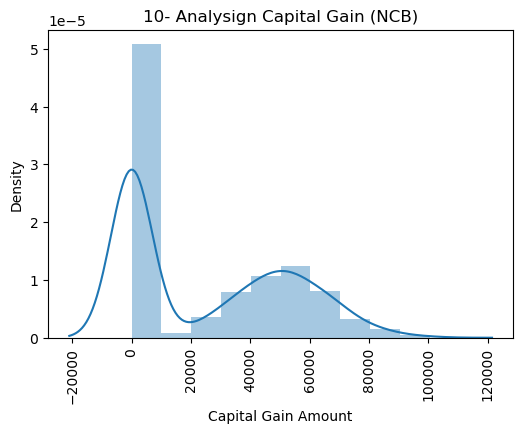

In [72]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('10- Analysign Capital Gain (NCB)')
sns.distplot(df['capital-gains'])
plt.xlabel('Capital Gain Amount', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# here below we find that maxium no . customers dint get capital gain because they might claimed in earlier session .
# and the maximum no. customer who got capital gain in between 50k- 60k
# the 1,05,500 is the Highest capital gain received by any customer
# the avrage or mean capital gain is 25,126

11) ----Analysing Capital Loss =====>>>

In [73]:
df['capital-loss'].nunique()

354

In [74]:
df['capital-loss'].value_counts()

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

In [75]:
'''
# as we can seen above that NO. OF CUSTOMER WHO NOT RECIVED CAPITAL GAIN IS = 508 (that means they claimed in earlier session)
# that means they must be get CAPITAL LOSS.
# So we can say that => [ No. of customers who Not get CAPITAL GAIN (508) == No. of customers who received CAPITAL LOSS (575)]
# But it is not equal                                           
# But here below :-
# Out of 1000 customers , the customers who got capital loss is (1000-425) = 575 
# so we found difference between 575 & 508 (572-508) = 67 (which would be considered as a new customers)

#  67 are those customer, who didnt get CAPITAL GAIN nor CAPITAL LOSS'''

'\n# as we can seen above that NO. OF CUSTOMER WHO NOT RECIVED CAPITAL GAIN IS = 508 (that means they claimed in earlier session)\n# that means they must be get CAPITAL LOSS.\n# So we can say that => [ No. of customers who Not get CAPITAL GAIN (508) == No. of customers who received CAPITAL LOSS (575)]\n# But it is not equal                                           \n# But here below :-\n# Out of 1000 customers , the customers who got capital loss is (1000-425) = 575 \n# so we found difference between 575 & 508 (572-508) = 67 (which would be considered as a new customers)\n\n#  67 are those customer, who didnt get CAPITAL GAIN nor CAPITAL LOSS'

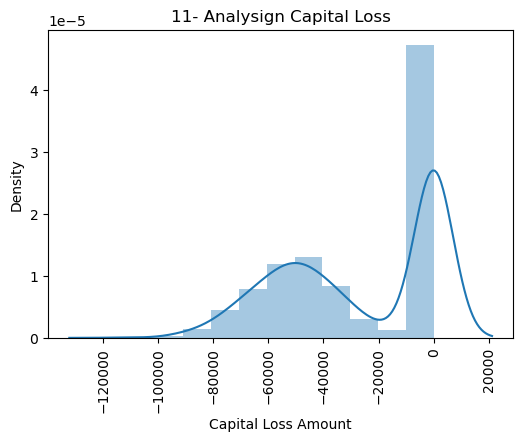

In [76]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('11- Analysign Capital Loss')
sns.distplot(df['capital-loss'])
plt.xlabel('Capital Loss Amount', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# maximum no. of customers who claimed in earlier session are having capital loss near about -50k to -60k

12) ----Analysing Incident Type ===>>

In [77]:
df['incident_type'].unique()

# following are the incident types for which customers are claimed.

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [78]:
df['incident_type'].nunique()
# there are 4 no. of unique incidents are present in the column.

4

In [79]:
df['incident_type'].value_counts()

# Maximum number of customres (419) are claimed in the incdent of - Multi-Vehicle Collision
# Minimum Number of customers (84) are claimed in the incident - when their car is parked.

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

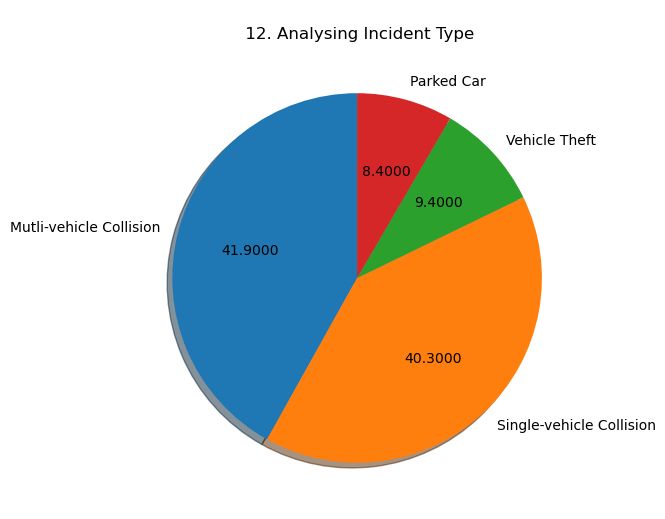

In [80]:
plt.figure(figsize=(6,6))
plt.title('\n 12. Analysing Incident Type')
plt.pie(df['incident_type'].value_counts(),startangle=90,autopct='%.4f',labels=['Mutli-vehicle Collision',
                                                                                'Single-vehicle Collision',
                                                                                'Vehicle Theft',
                                                                               'Parked Car'],shadow= True)
plt.show()

# here in the below pie chart we can find that the MULTI-VELHICLE COLIISION & SINGLE-VEHICLE COLLISION percentage is almost same
# which is 41.9%  & 40.3%.
# then Vehicel Theft = 9.4%
# car parked = 8.4 %

13) ----Analysing Collision Type ====>>>>

In [81]:
df['collision_type'].unique()
# following are the different type of collisions which has ben claimed by customers

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [82]:
df['collision_type'].nunique()
# there are 4 no. of unique collisions are observed.
# 'REAR' 'FRONT' 'SIDE' & '?' (not known)

4

In [83]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

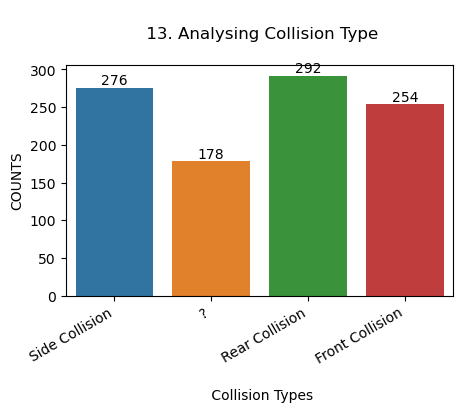

In [84]:
plt.figure (figsize = (5,3), facecolor = "white")
plt.title('\n 13. Analysing Collision Type\n')
ax=sns.countplot(x='collision_type', data = df)
ax.bar_label(ax.containers[0])
plt.xlabel('\n Collision Types', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# Highest No. of collsions are happened from REAR SIDE > SIDE COLLISION > FRONT COLLISION > ? NOT KNOWN
# from this analysis we can conclude that , maxium no. of collisions are happend due to OTHER'S MISTAKE

In [85]:
'''CONCLUSION - From the above analysis we can conclude that , maximum no. of collisions are happened due to OTHER'S MISTAKE.
beacuse here we can take REAR & SIDE COLLISION are mostly HAPPENED due to another partys mistake.
and in case of FRONT COLLISION it could be happend due to same driver '''

"CONCLUSION - From the above analysis we can conclude that , maximum no. of collisions are happened due to OTHER'S MISTAKE.\nbeacuse here we can take REAR & SIDE COLLISION are mostly HAPPENED due to another partys mistake.\nand in case of FRONT COLLISION it could be happend due to same driver "

14) ----Analysign Incident Severity ====>>

In [86]:
df['incident_severity'].unique()

# the followings are the severity levels of the incidents.

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [87]:
df['incident_severity'].nunique()
# there are four no. of severity levels of incidents are there.

4

In [88]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

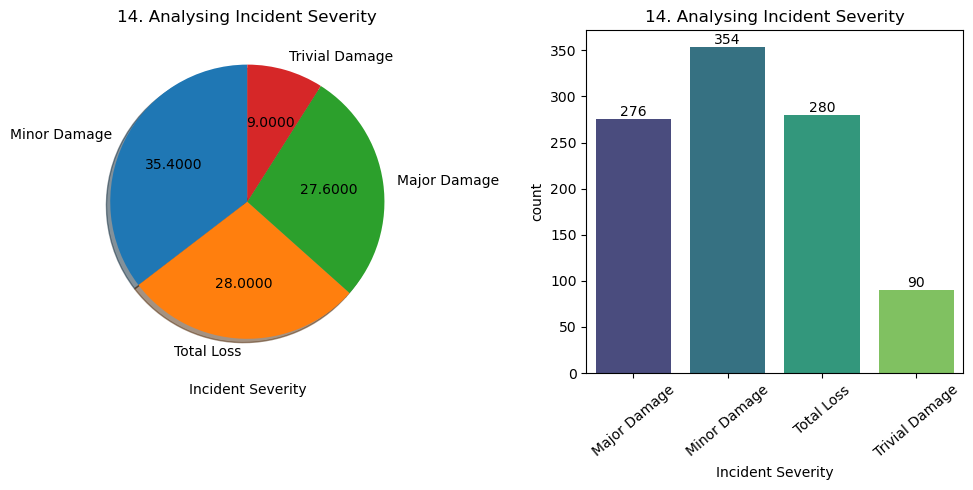

In [89]:
plt.figure(figsize = (10,5), facecolor='white')

plt.subplot(1,2,1)
# autopct='%.4f'
# autopct=lambda v: f'{v:.2f}%'
plt.title('14. Analysing Incident Severity')
plt.pie(df['incident_severity'].value_counts(),startangle=90,autopct='%.4f',
        labels=['Minor Damage', 'Total Loss','Major Damage','Trivial Damage'],shadow= True)
plt.xlabel('Incident Severity',fontsize=10)

plt.subplot(1,2,2)
plt.title('14. Analysing Incident Severity')
ax = sns.countplot(x='incident_severity', data = df,palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Incident Severity', fontsize = 10)
plt.xticks(rotation=40,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')


plt.tight_layout()
plt.show()

# here from the below PIE CHART & BAR PLOT we can clearly seen the difference of counts in INCIDENT SEVERITY.
# Highest No. Of Counts = 354 (35.4%) = MINOR DAMAGE
# 2nd Highest count = 280 (28%) = TOTAL LOSS
# 3rd Highest Count = 276 (27.6%) = MAJOR DAMAGE
# 4th count = 90 (9%) = TRIVIAL DAMAGE

15) Analysing Authorities Contacted ====>>>>

In [90]:
df['authorities_contacted'].unique()
# here below are the unique values present in the column

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [91]:
df['authorities_contacted'].nunique()

5

In [92]:
df['authorities_contacted'].value_counts()

# in 292 cases = Police Authorities hasbeen contacted
# in 223 cases = Fire department hasbeen contacted
# in 198 cases = others
# in 196 cases =  ambulance
# in 91 cases = no authorities are contacted

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

16) Analysing Incident State ===>>>

In [93]:
df['incident_state'].unique()
# following are the unique STATE NAMES (short forms) are present inside the column.

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [94]:
df['incident_state'].nunique()
# there are 7 unique states are present in the data

7

17) Analysing Incidnt Cities ====>>>

In [95]:
df['incident_city'].unique()
# unique cities names present inside the data

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [96]:
df['incident_city'].nunique()
# 7 unique cities names are present inside the column.

7

19) Analysing Hour Of Day , When Incident Happened ====>>>

In [97]:
df['incident_hour_of_the_day'].nunique()

24

In [98]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [99]:
df['incident_hour_of_the_day'].value_counts()

# Highest No. of Incidents are happend on 5:00 PM & 3:00 AM
# minimum No. of Incidents are happened at 1:00 AM

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

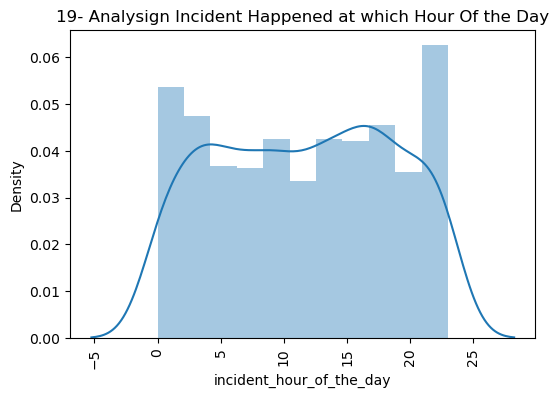

In [100]:
plt.figure(figsize = (6,4), facecolor='white')
plt.title('19- Analysign Incident Happened at which Hour Of the Day')
sns.distplot(df['incident_hour_of_the_day'])
plt.xlabel('incident_hour_of_the_day', fontsize = 10)
plt.xticks(rotation=90,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

# it is almost equally distributed

20) Analysing No. Of Vehicles Involved In the Collision ====>>>

In [101]:
df['number_of_vehicles_involved'].unique()

# minimum 1 vehicle is involved &
# maximum 4 vehicles are involved

array([1, 3, 4, 2], dtype=int64)

In [102]:
df['number_of_vehicles_involved'].value_counts()

# Highest in 581 cases only = 1 Vehicle Is Involved
# 2nd Highest 358 cases = 3 vehicles are involved.

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

21) Analysing Property Damage in the Incident ====>>>

In [103]:
df['property_damage'].unique()

# there are 3 categories are happened in this column i.e YES , NO , ? (don't know / reported)

array(['YES', '?', 'NO'], dtype=object)

In [104]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

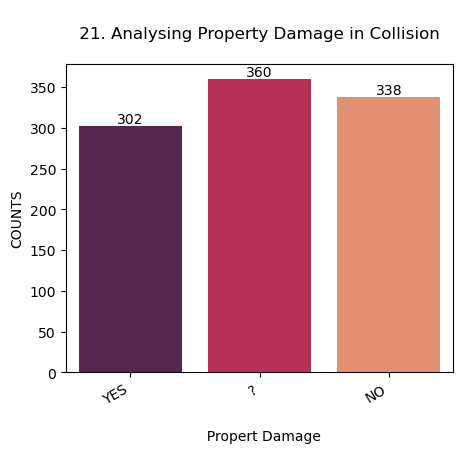

'CONCLUSION = OUT OF 1000 CASES IN ONLY 302 CASES PROPERTY DAMAGE IS REPORTED '

In [105]:
plt.figure (figsize = (5,4), facecolor = "white")
plt.title('\n 21. Analysing Property Damage in Collision \n')
ax=sns.countplot(x='property_damage', data = df, palette='rocket')
ax.bar_label(ax.containers[0])
plt.xlabel('\n  Propert Damage', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# In Highest 360 cases propert damage is = ? (Not identified)
# in 338 cases property Damage = NO (Not reported)
#  in 302 cases property Damage - YES 

'''CONCLUSION = OUT OF 1000 CASES IN ONLY 302 CASES PROPERTY DAMAGE IS REPORTED ''' 

22)---- Analysing Witnesses Involved ====>>>

In [106]:
df['witnesses'].unique()

# minimum '0' & maximum '3' witnesses are involved in any case

array([2, 0, 3, 1], dtype=int64)

In [107]:
df['witnesses'].value_counts()
# all 1,2,3 & 4 witnesses are almost equally count in all 1000 cases.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

23) Analysing Police Report ====>>>>

In [108]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [109]:
df['police_report_available'].value_counts()

# out of 1000 cases , in only 314 cases POLICE REPORTS ARE AVAILABLE.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

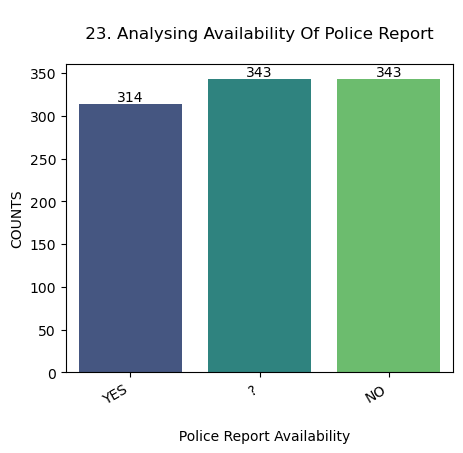

In [110]:
plt.figure (figsize = (5,4), facecolor = "white")
plt.title('\n 23. Analysing Availability Of Police Report \n')
ax=sns.countplot(x='police_report_available', data = df, palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('\n  Police Report Availability', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()


24) Analysing Total Claimed Amount ===>>>

In [111]:
df['total_claim_amount'].nunique()

763

In [112]:
df['total_claim_amount'].min()

# minimum claimed amount is $ 100 only

100

In [113]:
df['total_claim_amount'].max()
# highest calimed amount is $ 1,14,920

114920

In [114]:
df['total_claim_amount'].mean()

# $52,761 is the average/mean claimed amount of customers.

52761.94

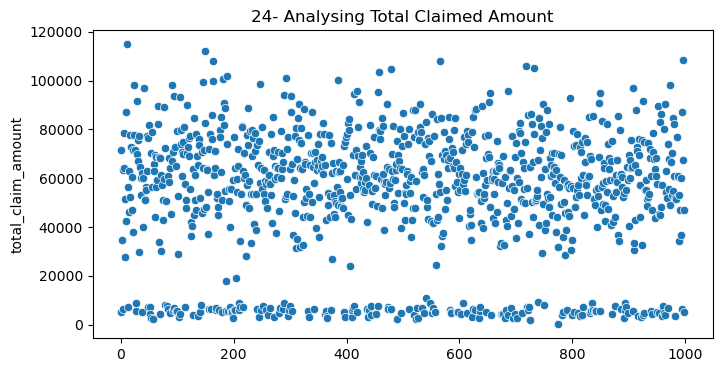

In [115]:
plt.figure(figsize = (8,4), facecolor='white')
plt.title('24- Analysing Total Claimed Amount')
sns.scatterplot(df.index,df['total_claim_amount'])
# plt.xlabel('Total Volume', fontsize = 10)
# plt.xticks(rotation=0,ha ='center')
# plt.ylabel('no. of counts', fontsize = 10)
# plt.yticks(rotation=0, ha = 'center')
plt.show()

25) Analysing Fraud Reported ===>>>

In [116]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [117]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

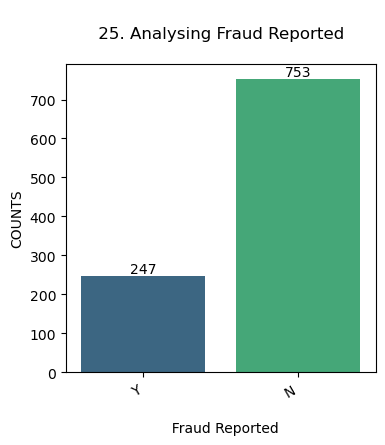

In [118]:
plt.figure (figsize = (4,4), facecolor = "white")
plt.title('\n 25. Analysing Fraud Reported \n')
ax=sns.countplot(x='fraud_reported', data = df, palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# here in the below graph we can find that out of 1000 cases, in 247 cases the FRAUD HAS REPORTED

===============  UNIVARIATE ANALYSIS FOR COLUMNS COMPLETED  ==================================

                ================= INITIALIZING BIVARIATE & MULTI-VARIATE ANALYSIS  ==============================

1) Analysing Reported Fraud analysis by Policy State ====>> 

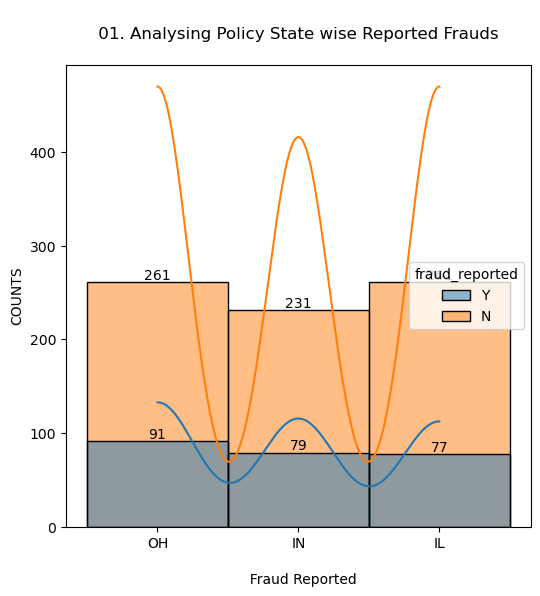

In [119]:
plt.figure (figsize = (6,6), facecolor = "white")
plt.title('\n 01. Analysing Policy State wise Reported Frauds \n')
ax=sns.histplot(data=df, x="policy_state", hue="fraud_reported",kde=True)
# ax.bar_label(ax.containers[0])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
# plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

# here from the below analysis we can find that maximum numbers of frauds are reported in 'OH-State' 91/261.
# here we can also find that the SUM of ALL THREE STATES are = 261+231+261 = 753, but we are having total 1000 datapoints,
#  so 1000-753 = 247 datapoints are not in these 3 states.

2) Analysing Month wise analysis of Reported Frauds ===>>

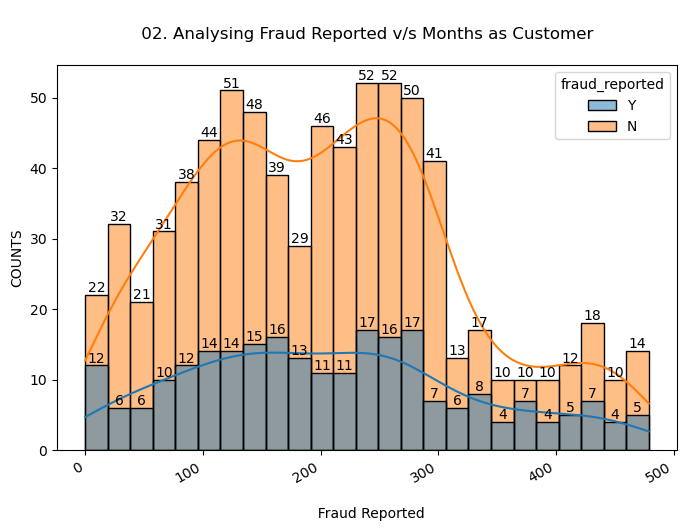

In [120]:
plt.figure (figsize = (8,5), facecolor = "white")
plt.title('\n 02. Analysing Fraud Reported v/s Months as Customer \n')
ax=sns.histplot(data=df, x="months_as_customer", hue="fraud_reported",kde=True,bins=25)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# here fromt the below analysis we can find that HIGHEST PERCENTAGE OF FRAUDS are reported in INITIAL MONTHS.
# Highest frauds are reported in intial 20 months, there are 12 frouds are reported out of on 22 customers, that means it is...
# ...upto 50% frauds are reported during this phase.

# after initial months , reported frauds are gradually increasing from 60th to 180th months
# during the period of 250th to 280th month, maximum numbers of frauds are repoerted, out of 50-52 customers- 16-17 frauds reported
#
# above 300 months there is huge downlfall in customers and also in the reported frauds.

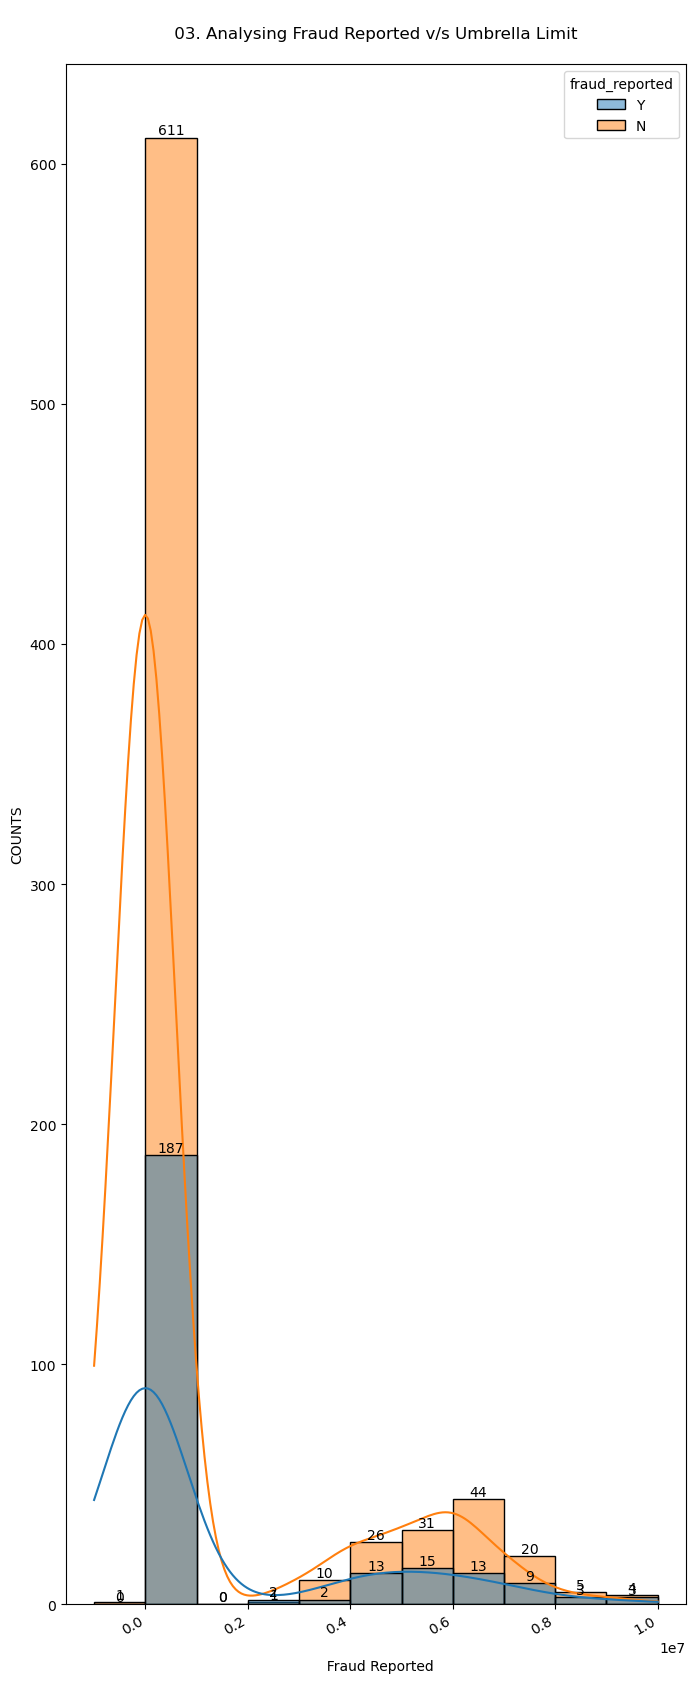

In [121]:
plt.figure (figsize = (8,20), facecolor = "white")
plt.title('\n 03. Analysing Fraud Reported v/s Umbrella Limit \n')
ax=sns.histplot(data=df, x="umbrella_limit", hue="fraud_reported",kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# here from the below analysis we can find that :-
# the froud reported in % for the following UMBRELLA LIMIT :-

#  Umbrella    Total       Fraud      Percentage
#   limit    customers   reported        wise

# 00      =    611        167          26.18 %
# 20 LAKH =    02         01           50.00 %
# 30 LAKH =    10         02           20.00 %
# 40 LAKH =    26         13           50.00 %
# 50 LAKH =    31         15           48.00 %
# 60 LAKH =    44         13           29.00 %
# 70 LAKH =    20         09           45.00 %
# 80 LAKH =    05         03           60.00 %
# 90 LAKH =    03         02           66.66 %
#  1 CR   =

# from the above analysis we can clearly find that HIGHER THE UMBRELLA LIMIT == HIGHER CHANCES OF FRAUD

4) Analysing Reported Fraud v/s Policy Deductables ===>>>

In [122]:
# policy_deductable are the amount of money that a customer is responsible for paying toward an insured loss

In [123]:
df['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

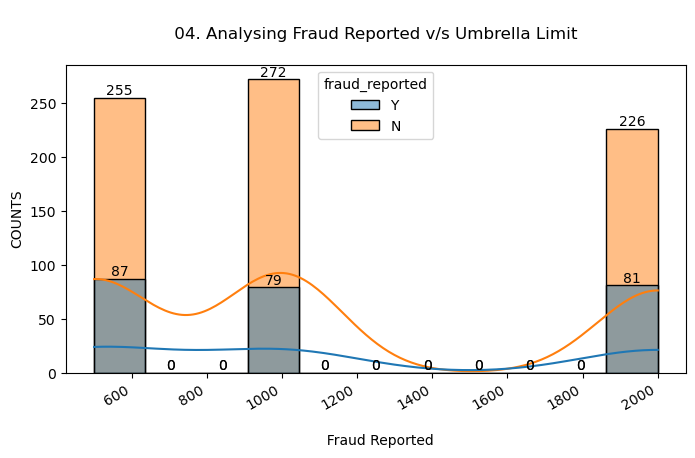

In [124]:
plt.figure (figsize = (8,4), facecolor = "white")
plt.title('\n 04. Analysing Fraud Reported v/s Umbrella Limit \n')
ax=sns.histplot(data=df, x="policy_deductable", hue="fraud_reported",kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# policy_deductable are the amount of money that a customer is responsible for paying toward an insured loss
# Policy Deeuctables are $500, $1000,  $2000
#  $500  = 87/255  = 34 %
# $1000  = 79/272  = 29 %
# $2000  = 81/226  = 35 %

# the Fraud Reported % is Highest at $2000 & $1000 deductables
# more the amount of policy deductable == more the chances of fraud reported.

5) Analysing Reported Frauds v/s Incident type ====>>>

In [125]:
'''This refers to the type of claim/vehicle damage made by customer'''

'This refers to the type of claim/vehicle damage made by customer'

In [126]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

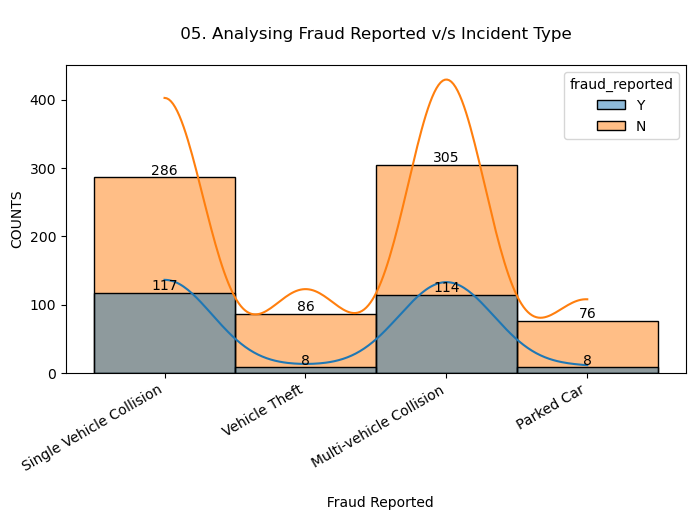

In [127]:
plt.figure (figsize = (8,4), facecolor = "white")
plt.title('\n 05. Analysing Fraud Reported v/s Incident Type \n')
ax=sns.histplot(data=df, x="incident_type", hue="fraud_reported",kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
plt.show()

# here from the below INCIDENT TYPES we can find that :-  FRAUD REPORTED  /  TOTAL CUSTOMERS

#  Single Vehicle Collision  = 117/286  =  40 % FRAUD REPORTED
#  Vehicle Theft             =    8/86  =  9.3 % FRAUD REPORTED
#  Multi-vehicle Collision   = 114/305  =  37.37 % FRAUD REPORTED
#  Parked Car                =    8/76  =  10.52 % FRAUD REPORTED

# CONCLUSION = HIGHEST FRAUDS ARE REPORTED FROM 'single vehicle collision' & 'multi-vehicle collision'
# Highest Numbers of Claims reported in = MULTI-VEHICLE COLLISION > SINGLE VEHICLE COLLISION

6) Analysing Fraud Reported v/s Collision Type ====>>

In [128]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

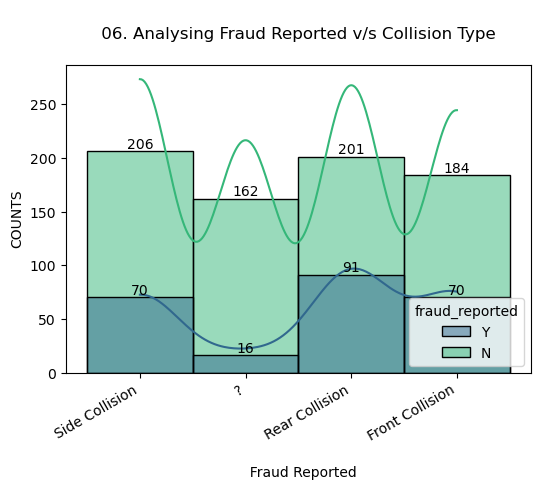

In [129]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n 06. Analysing Fraud Reported v/s Collision Type \n')
ax=sns.histplot(data=df, x="collision_type", hue="fraud_reported",kde=True,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper right')
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

# From the below analysis we can find that ; 
# 1- Highest Numbers of claims are reported in 'Side Collision' (206)
# 2- Lowest Numbers of claims are reported in '?' (not mentioned) (162)

# from the following collision types we cna find that :-
# 1) Side Collision    =  70 / 206  =  34 %
# 2) Front Collision   =  70 / 184  =  38 %
# 3) Rear Collision    =  91 / 201  =  45 %  (Highest % Of Fraud Reported)
# 4) '?' Not Mentioned =  16 / 162  =  9.8 % (Lowest % of Fraud Reported)

# CONCLUSION = From the above analysis we can say that HIGHEST NO. OF CLAIMS REPORTED IN = 'SIDE & REAR COLLISION'
#              that means most of the accidents are happening due to other driver's mistake.

7) Analysing Fraud Reported v/s Incident Severity ===>>

In [130]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

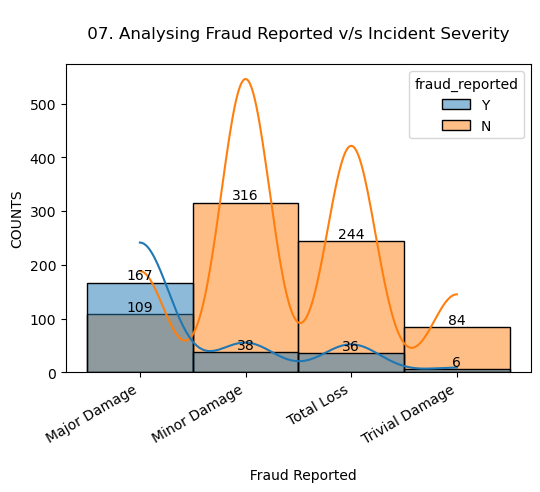

In [131]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n 07. Analysing Fraud Reported v/s Incident Severity \n')
ax=sns.histplot(data=df, x="incident_severity", hue="fraud_reported",kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper right')
plt.show()

# here we can find an INTRESTING FACT that HIGHEST NUMBERS OF FRAUD'S are reported in MAJOR DAMAGE CATEGORY.

# MAJOR DAMAGE   = 109 / 167  = 65 % (HIGHEST NUMBERS OF REPORTED)
# MINOR DAMAGE   = 38 / 316   = 12 % 
# TOTAL LOSS     = 36 / 244   = 14.75 % 
# TRIVIAL DAMAGE = 6 / 84     =  7 % 

8) Analysing Fraud Reported v/s Authirities Contacted ====>>>

In [132]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

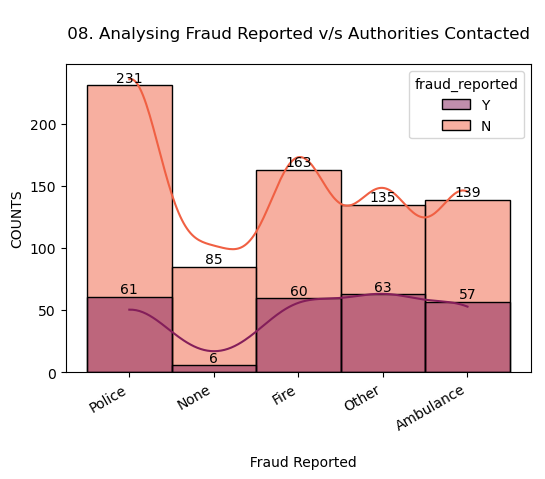

In [133]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n 08. Analysing Fraud Reported v/s Authorities Contacted \n')
ax=sns.histplot(data=df, x="authorities_contacted", hue="fraud_reported",kde=True,palette='rocket')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Fraud Reported', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper right')
plt.show()

# here we can see that most of the claims are reported where 'POLICE AUTHORITY' hasbeen contacted.
# the 'Reprted Fraud's are almost similar in all categories, except- NONE
# OFFCOURSE beacuse the claims has not been passed if the authories are not contacted at the time of collision/accident .

# but the SCENERIO is different if we an analyse the figure in % wise
# Police Authority   = 61 /231  =  26 %
# Fire authority     = 60 /163  =  36.80 %
# other authorities  = 63 /135  =  46.66 % (HIGHEST FRAUD'S REPORTED)
# ambulance          = 57 /139  =  41 %
# None               =  6 /85   =  7 % (LOWEST FRAUDS ARE REPORTED)

# from the above analysis we can say that :
# 1- HIGHEST NO. OF FRAUDS are reported in 'Other Authorities Contacted', that means in FRAUDERS are avoid to call POLICE AUTHORITY.
#                because here we can clearly see that MAXIMUM number of claims are reported where POLICE was contacted..
#                but maximum no. of fraud are reported where POLICE is not contacted.
# 2- ONE MORE INTRESTING FACT - 2nd HIGHEST FRAUDS REPORTED where AMBULANCE is NOT CONTACTED (that means there may not a major damage/ injury)
#                  but above we can also found that MAXIUM no. of frauds are found where 'MAJOR DAMAGE'...

# FACT -                  '''THEN HOW IT COULD BE POSSIBLE THAT DAMAGE IS MAJOR BUT AMBULANCE IS NOT CONTACTED'''

9) Analysing Fraud Reported v/s No. Of Vehicles Involved ====>>>>

In [134]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

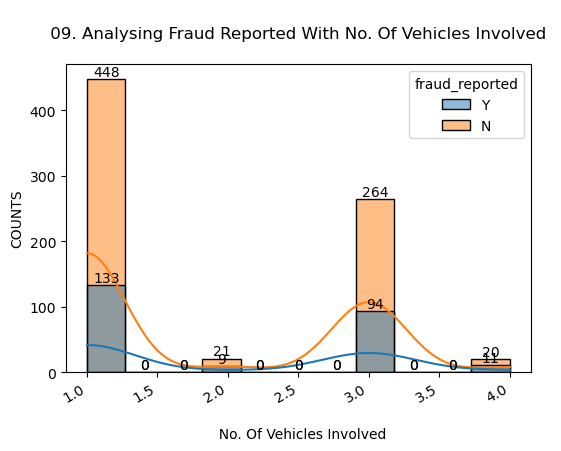

In [135]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n 09. Analysing Fraud Reported With No. Of Vehicles Involved \n')
ax=sns.histplot(data=df, x="number_of_vehicles_involved", hue="fraud_reported",kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  No. Of Vehicles Involved', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper right')
plt.show()

# from the below analysis of involvement of vehciles we can find that :- 
# 1) One Vehicle Involved   :-  133 / 448  = 29.68 % (Highest Numbers of Frauds are reported -133)
# 2) Two Vehicles Involved  :-  9 / 21     = 42.85 %
# 3) Three Vehicle Involved :-  94 / 264   = 35.60 %
# 4) Four Vehicles Involved :-  11 / 20    = 55 %   (Highest Percentage Of Frauds are reported) 55%

# Maximum no. of frauds are reported where only 1 vehicle is involved, which obeviously a doubtful case.
# but percentage wise it is '4 vehicles involved'

10) Analysing Fraud Reported v/s Witness Involved ====>>>

In [136]:
# how many witnesses are involved during the accident.

In [137]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

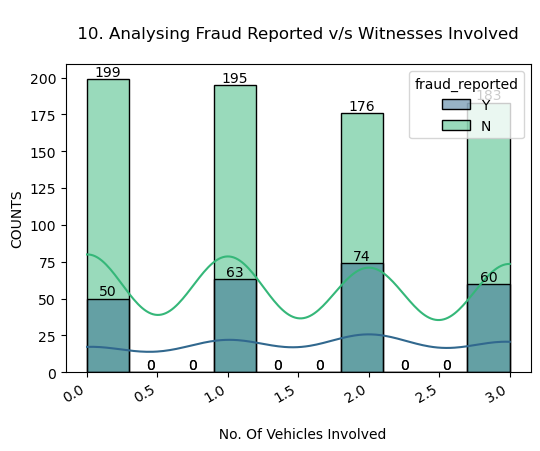

In [138]:
plt.figure (figsize = (6,4), facecolor = "white")
plt.title('\n 10. Analysing Fraud Reported v/s Witnesses Involved \n')
ax=sns.histplot(data=df, x="witnesses", hue="fraud_reported",kde=True,bins=10,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  No. Of Vehicles Involved', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='center',fontsize=15)
# 'best', 'upper right', 'upper left', 'lower left', 'lower right',
# 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
plt.show()

# Analysis acoording to wintesses involved is :-
# 1) Zero Witnesse involved     =  50 / 199  = 25 %
# 2) One Witnesse involved      =  63 / 195  = 32 %
# 3) Two Witnesse involved      =  74 / 176  = 42 %  (Highest % & No. of Fraud Reported)
# 4) Three Witnesse involved    =  60 / 183  = 32.78 %

11 & 12 )  Analysing Reported Frauds State Wise & City Wise =====>>>>

In [139]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [140]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

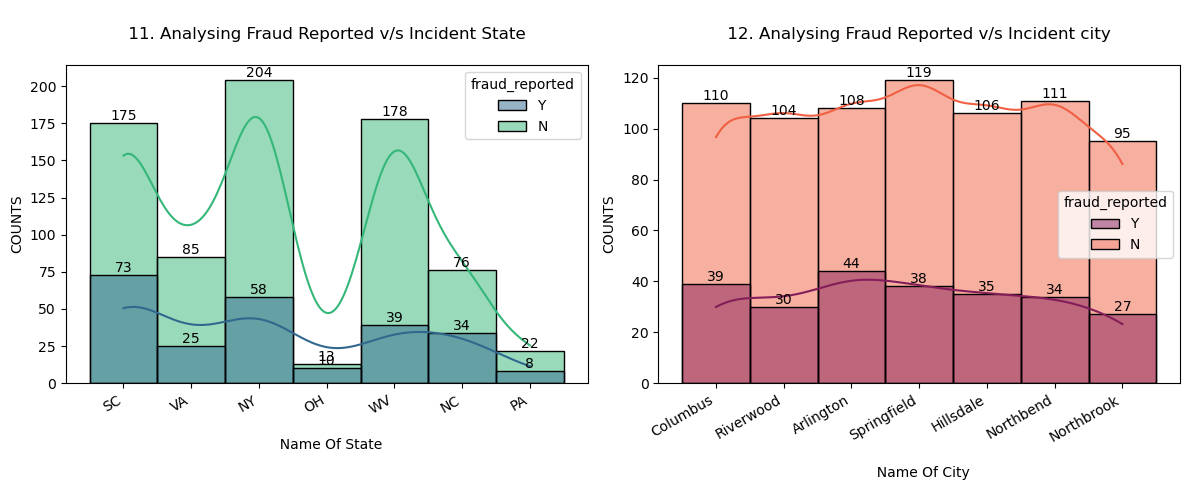

In [141]:
plt.figure (figsize = (12,5), facecolor = "white")

plt.subplot(1,2,1)
plt.title('\n 11. Analysing Fraud Reported v/s Incident State \n')
ax=sns.histplot(data=df, x="incident_state", hue="fraud_reported",kde=True,bins=10,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Name Of State', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper right',fontsize=10)

plt.subplot(1,2,2)
plt.title('\n 12. Analysing Fraud Reported v/s Incident city \n')
ax=sns.histplot(data=df, x="incident_city", hue="fraud_reported",kde=True,bins=10,palette='rocket')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Name Of City', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper left',fontsize=10)


plt.tight_layout()
plt.show()

#      STATE WISE FRAUD REPORT                                                       CITY WISE FRAUD REPORTED

# SC   =   73 / 175  =  41.71 %                                                 Columbus     =  39 / 110  =  35.45 %
# VA   =   25 / 85   =  28.41 %                                                 Riverwood    =  30 / 104  =  28.84 %
# NY   =   58 / 204  =  28.43 %                                                 Arlington    =  44 / 108  =  40.74 % (HIGHEST)
# OH   =   10 / 12   =  83.33 % (HIghest Fraud Reported)                        Springfield  =  38 / 119  =  31.93 %
# WV   =   39 / 178  =  21.91 %                                                 Hillsdale    =  35 / 106  =  33.00 %
# NC   =   34 / 76   =  44.73 %                                                 Northbend    =  34 / 111  =  30.63 %
# PA   =    8 / 22   =  36.36 %                                                 Northbrook   =  27 / 95   =  28.42 %

In [142]:
'''
Here from the above graph analysis we can find the FRAUD REPORTED IN STATE & CITY WISE :-
SC- SOUTH CAROLINA,  VA- VIRGINIA,  NY-NEW YORK,  OH-OHIO,  WV-WEST VERGINIA, NC-NORTH CAROLINA,  PA-PENNSYLVANIA

                                              Number     |       STATE                   Number      |       CITY

* Highest Numbers Of Claims Reported =         204              NEW YORK                   119            Spring FIeld
* Highest Numbers Of Fraud Reported  =          73           SOUTH CAROLINA                44               Arlington
* % Wise Highest Fraud Reports       =        83.33 %             OHIO                    40.74 %           Arlington

* Lowest Numbers Of Claims Reported  =          12                OHIO                     95              NORTHBROOK
*Lowest Numbers Of Fraud Reported    =           8           PENNSILVANIYA                 27              NORTHBROOK
* % wise Lowest Fraud Reported       =        21.91 %        WEST VERGINIA                28.42 %          NORTHBROOK

'''

'\nHere from the above graph analysis we can find the FRAUD REPORTED IN STATE & CITY WISE :-\nSC- SOUTH CAROLINA,  VA- VIRGINIA,  NY-NEW YORK,  OH-OHIO,  WV-WEST VERGINIA, NC-NORTH CAROLINA,  PA-PENNSYLVANIA\n\n                                              Number     |       STATE                   Number      |       CITY\n\n* Highest Numbers Of Claims Reported =         204              NEW YORK                   119            Spring FIeld\n* Highest Numbers Of Fraud Reported  =          73           SOUTH CAROLINA                44               Arlington\n* % Wise Highest Fraud Reports       =        83.33 %             OHIO                    40.74 %           Arlington\n\n* Lowest Numbers Of Claims Reported  =          12                OHIO                     95              NORTHBROOK\n*Lowest Numbers Of Fraud Reported    =           8           PENNSILVANIYA                 27              NORTHBROOK\n* % wise Lowest Fraud Reported       =        21.91 %        WEST VERGINIA

13,14,15 & 16 ) Analysing Reported Frauds by Total Claim Amount, Injury Claim, Property Claim & Vehicle Claim ======>>>>

In [143]:
df['total_claim_amount'].nunique()

763

In [144]:
df['injury_claim'].nunique()

638

In [145]:
df['property_claim'].nunique()

626

In [146]:
df['vehicle_claim'].nunique()

726

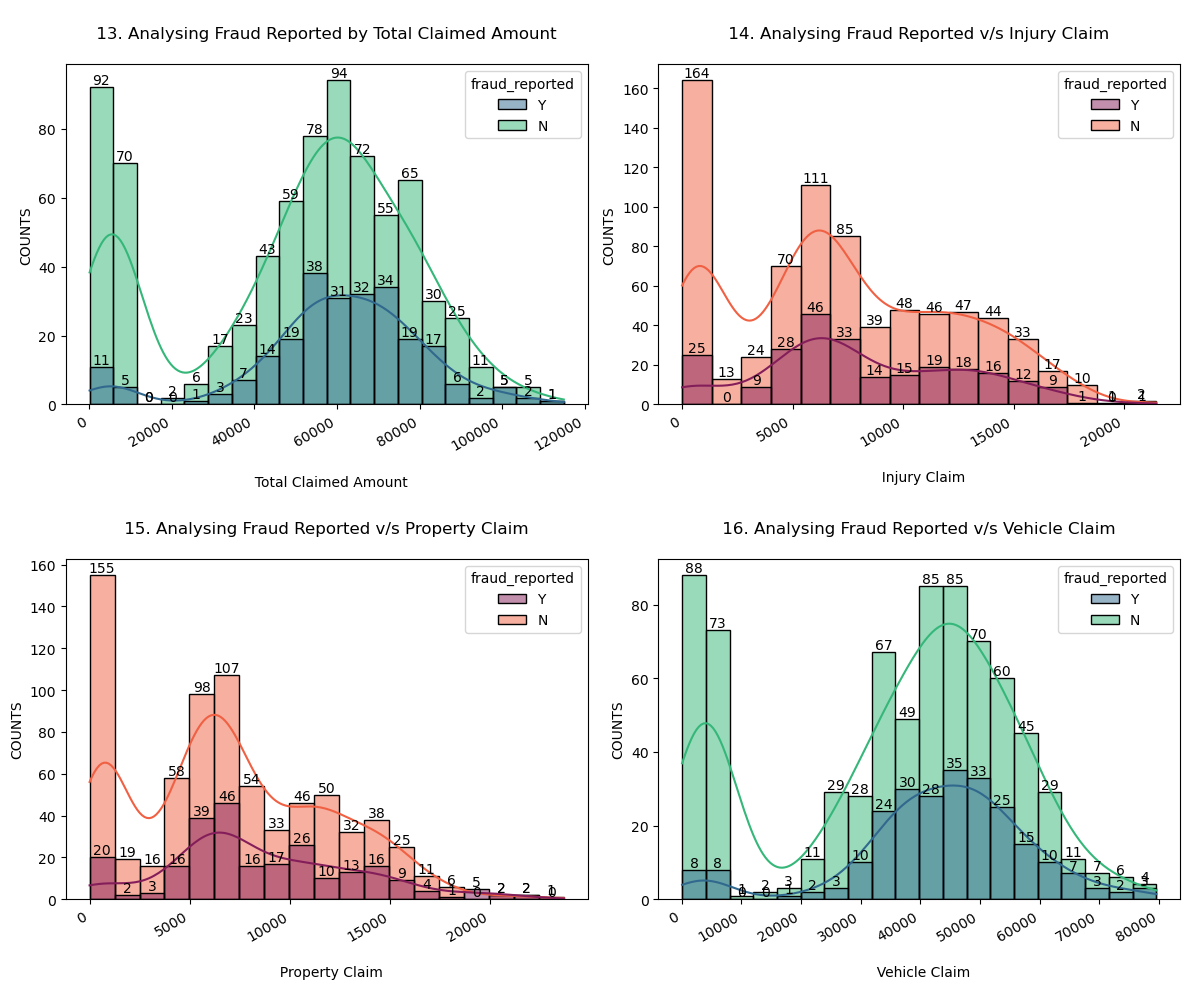

'\n  TOTAL CLAIM AMOUNT ==>  \n                     * Total Numbers Of claims are HIghest in between =  $0 - $5000  & $55,000 - $70,000\n                     * Total Numbers Of Reported Frauds by Number wise & % wise are also Highest in between = $55,000 - $70,000\n\n\n  INJURY CLAIMS ==>\n                     * Total Numbers Of INJURY Claims are Highestin between =$0 - $1000  & at $6000\n                     * Total Number of Reported Frauds are also Highest in between = $5000 - $7000\n                     * Number of Frauds are gradually decreasing as increse in amount of injury calims.\n'

In [147]:
plt.figure (figsize = (12,10), facecolor = "white")

plt.subplot(2,2,1)
plt.title('\n 13. Analysing Fraud Reported by Total Claimed Amount \n')
ax=sns.histplot(data=df, x="total_claim_amount", hue="fraud_reported",kde=True,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Total Claimed Amount', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper right',fontsize=10)

# -------------------------------------------------------------------------------------------------

plt.subplot(2,2,2)
plt.title('\n 14. Analysing Fraud Reported v/s Injury Claim \n')
ax=sns.histplot(data=df, x="injury_claim", hue="fraud_reported",kde=True,palette='rocket')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Injury Claim', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper left',fontsize=10)

# -----------------------------------------------------------------------------------------------------------

plt.subplot(2,2,3)
plt.title('\n 15. Analysing Fraud Reported v/s Property Claim \n')
ax=sns.histplot(data=df, x="property_claim", hue="fraud_reported",kde=True,palette='rocket')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Property Claim', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper left',fontsize=10)

# ----------------------------------------------------------------------------------------------------------

plt.subplot(2,2,4)
plt.title('\n 16. Analysing Fraud Reported v/s Vehicle Claim \n')
ax=sns.histplot(data=df, x="vehicle_claim", hue="fraud_reported",kde=True,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Vehicle Claim', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(loc='upper left')

# -----------------------------------------------------------------------------------------------------------

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------------------------------------
'''
  TOTAL CLAIM AMOUNT ==>  
                     * Total Numbers Of claims are HIghest in between =  $0 - $5000  & $55,000 - $70,000
                     * Total Numbers Of Reported Frauds by Number wise & % wise are also Highest in between = $55,000 - $70,000


  INJURY CLAIMS ==>
                     * Total Numbers Of INJURY Claims are Highestin between =$0 - $1000  & at $6000
                     * Total Number of Reported Frauds are also Highest in between = $5000 - $7000
                     * Number of Frauds are gradually decreasing as increse in amount of injury calims.
'''


In [148]:
'''
PROPERTY CLAIMS ==> 
                 * Total Numbers of PROPERTY CLAIMS are highet at $0 - $1000  & at $6000 - $7000
                 * Then Numbers of claims are  Decreasing as increasing in claim amount.
                 
VEHICLE CLAIMS ==>
                 * Total Numbers of Vehicels Claims are highest at $0 - $10,000  & $40,000 - $50,000
                 * Total Number of Fraud Reported are also Highest in between $ 35,000 - $50,000
'''

'\nPROPERTY CLAIMS ==> \n                 * Total Numbers of PROPERTY CLAIMS are highet at $0 - $1000  & at $6000 - $7000\n                 * Then Numbers of claims are  Decreasing as increasing in claim amount.\n                 \nVEHICLE CLAIMS ==>\n                 * Total Numbers of Vehicels Claims are highest at $0 - $10,000  & $40,000 - $50,000\n                 * Total Number of Fraud Reported are also Highest in between $ 35,000 - $50,000\n'

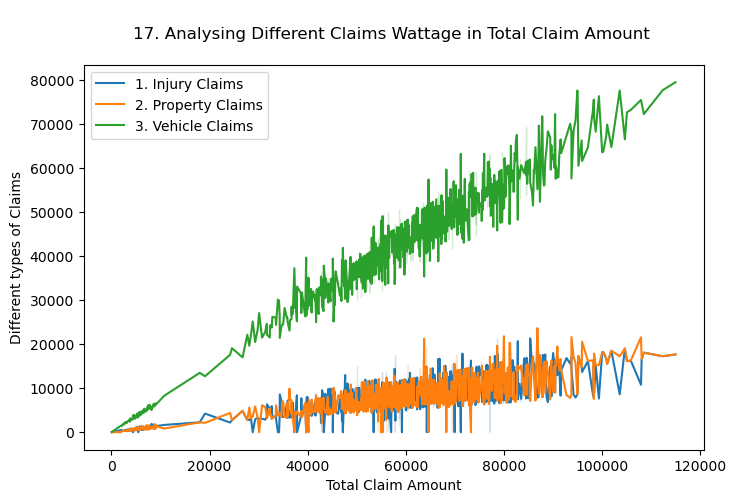

'\nhere from the below graph it clear that, In TOTAL CALAIM AMOUNT ,Company has Received Highest Vehicles Claims as \ncompared to other Injury Claims & Property Claims.\n\nWe can say that in most of the cases the Vehicle claims are Incresing as the the Total Claim Amount Increases.\n'

In [149]:
plt.figure(figsize=(8,5))
plt.title('\n17. Analysing Different Claims Wattage in Total Claim Amount \n')
sns.lineplot (data=df, x='total_claim_amount', y='injury_claim', label = '1. Injury Claims')
sns.lineplot (data=df, x='total_claim_amount', y='property_claim', label = '2. Property Claims')
sns.lineplot (data=df, x='total_claim_amount', y='vehicle_claim', label = '3. Vehicle Claims')
plt.xlabel('Total Claim Amount')
plt.ylabel('Different types of Claims')
# plt.legend()
plt.show()

'''
here from the below graph it clear that, In TOTAL CALAIM AMOUNT ,Company has Received Highest Vehicles Claims as 
compared to other Injury Claims & Property Claims.

We can say that in most of the cases the Vehicle claims are Incresing as the the Total Claim Amount Increases.
'''

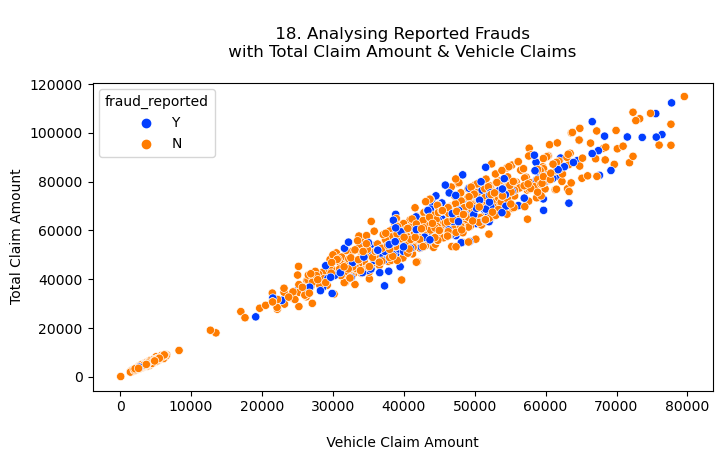

'\nHere from the below graph it is cleared that as the increase in total claims , vehicle Claims are also increasing with \nNumbers of Reported Frauds.\n\nthese all three situations are directly propertional with each other.\n'

In [150]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('\n 18. Analysing Reported Frauds \n with Total Claim Amount & Vehicle Claims \n')
sns.scatterplot (x= 'vehicle_claim', y= 'total_claim_amount',hue = 'fraud_reported', data= df, palette = "bright")
plt.xlabel ('\n Vehicle Claim Amount ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Total Claim Amount')
plt.show()

'''
Here from the below graph it is cleared that as the increase in total claims , vehicle Claims are also increasing with 
Numbers of Reported Frauds.

these all three situations are directly propertional with each other.
'''

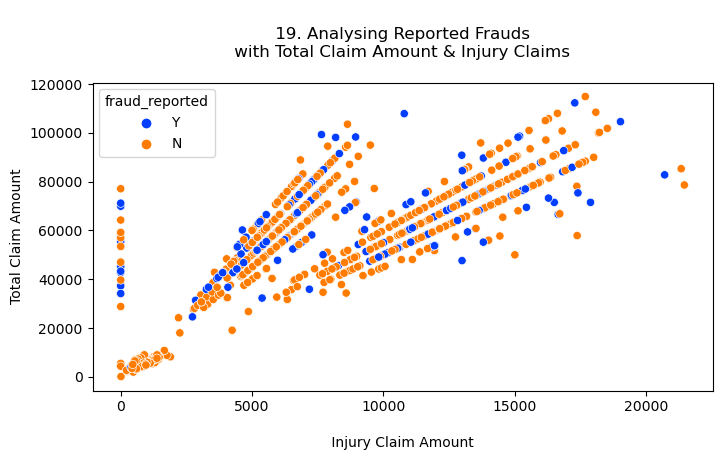

'\nIn Total Claim Amount , most of the times the injury Claim is Near about 0-1000 only.\nReported Injury claim amount are lesser as compared to Vehicle Claims.\nbut here also Reported Frauds are scattred in all over the graph (they are also present at HIGHER AMOUNTS)\n'

In [151]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('\n 19. Analysing Reported Frauds \n with Total Claim Amount & Injury Claims \n')
sns.scatterplot (x= 'injury_claim', y= 'total_claim_amount',hue = 'fraud_reported', data= df, palette = "bright")
plt.xlabel ('\n Injury Claim Amount ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Total Claim Amount')
plt.show()

'''
In Total Claim Amount , most of the times the injury Claim is Near about 0-1000 only.
Reported Injury claim amount are lesser as compared to Vehicle Claims.
but here also Reported Frauds are scattred in all over the graph (they are also present at HIGHER AMOUNTS)
'''

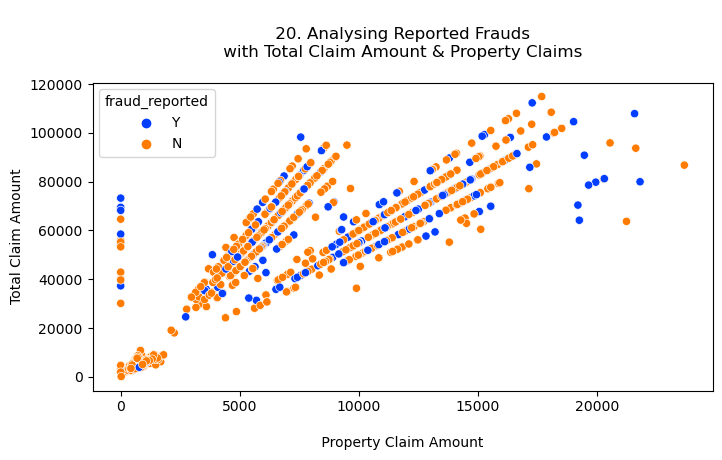

'\nThis Scenerio is similar as compared to property Claims\nHere we can find the Higher Presence Of Reported Frauds at $18,000 - $20,000\n\nCONCLUSION = we can say that Higher Property Claims are seems to be SUSPIOUS & MUST BE INVESTIGATED FIRST\n'

In [152]:
plt.figure(figsize=(8,4),facecolor="white")
plt.title('\n 20. Analysing Reported Frauds \n with Total Claim Amount & Property Claims \n')
sns.scatterplot (x= 'property_claim', y= 'total_claim_amount',hue = 'fraud_reported', data= df, palette = "bright")
plt.xlabel ('\n Property Claim Amount ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Total Claim Amount')
plt.show()
'''
This Scenerio is similar as compared to property Claims
Here we can find the Higher Presence Of Reported Frauds at $18,000 - $20,000

CONCLUSION = we can say that Higher Property Claims are seems to be SUSPIOUS & MUST BE INVESTIGATED FIRST
'''

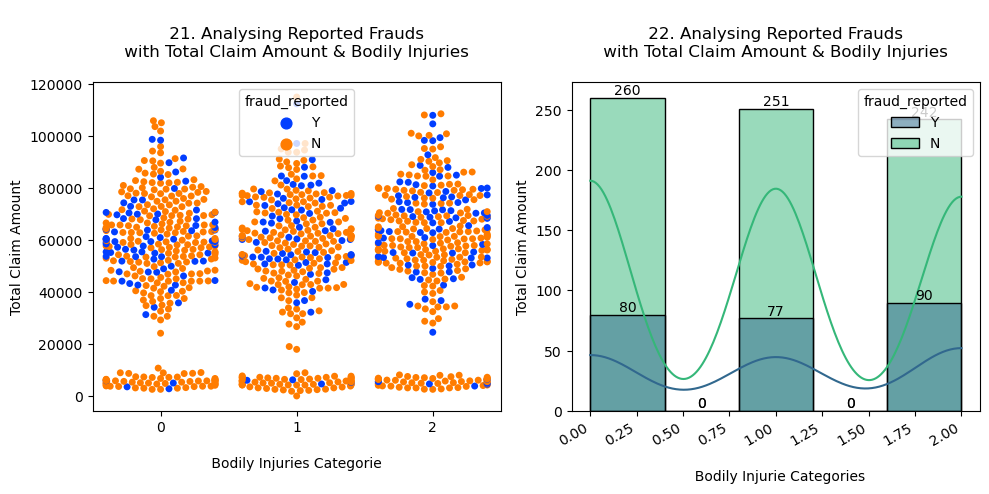

"\n*here all three categories '0' '1' & '2' are having claims in between 0- 5000\n* Number of Frauds are also Present in all three categiries.\n* there may be some Presence of Outliers in categorie - '1'\n* Number of Claims are Higher in Categorie-'0' as comapred to '1' & '2'\n* But Number of Frauds Reported are Higher in Categorie '2' , as compared to other '0' & '1'\n"

In [153]:
plt.figure (figsize = (10,5), facecolor = "white")

plt.subplot(1,2,1)
plt.title('\n 21. Analysing Reported Frauds \n with Total Claim Amount & Bodily Injuries \n')
sns.swarmplot (x= 'bodily_injuries', y= 'total_claim_amount',hue = 'fraud_reported', data= df, palette = "bright")
plt.xlabel ('\n Bodily Injuries Categorie ')
plt.xticks(rotation=0, ha='center',fontsize=10)
plt.ylabel('Total Claim Amount')
# plt.legend(fontsize=8)

plt.subplot(1,2,2)
plt.title('\n 22. Analysing Reported Frauds \n with Total Claim Amount & Bodily Injuries \n')
ax=sns.histplot(data=df, x="bodily_injuries", hue="fraud_reported",bins=5,kde=True,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Bodily Injurie Categories', fontsize=10)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('Total Claim Amount',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend(fontsize=8)



plt.tight_layout()
plt.show()
'''
*here all three categories '0' '1' & '2' are having claims in between 0- 5000
* Number of Frauds are also Present in all three categiries.
* there may be some Presence of Outliers in categorie - '1'
* Number of Claims are Higher in Categorie-'0' as comapred to '1' & '2'
* But Number of Frauds Reported are Higher in Categorie '2' , as compared to other '0' & '1'
'''

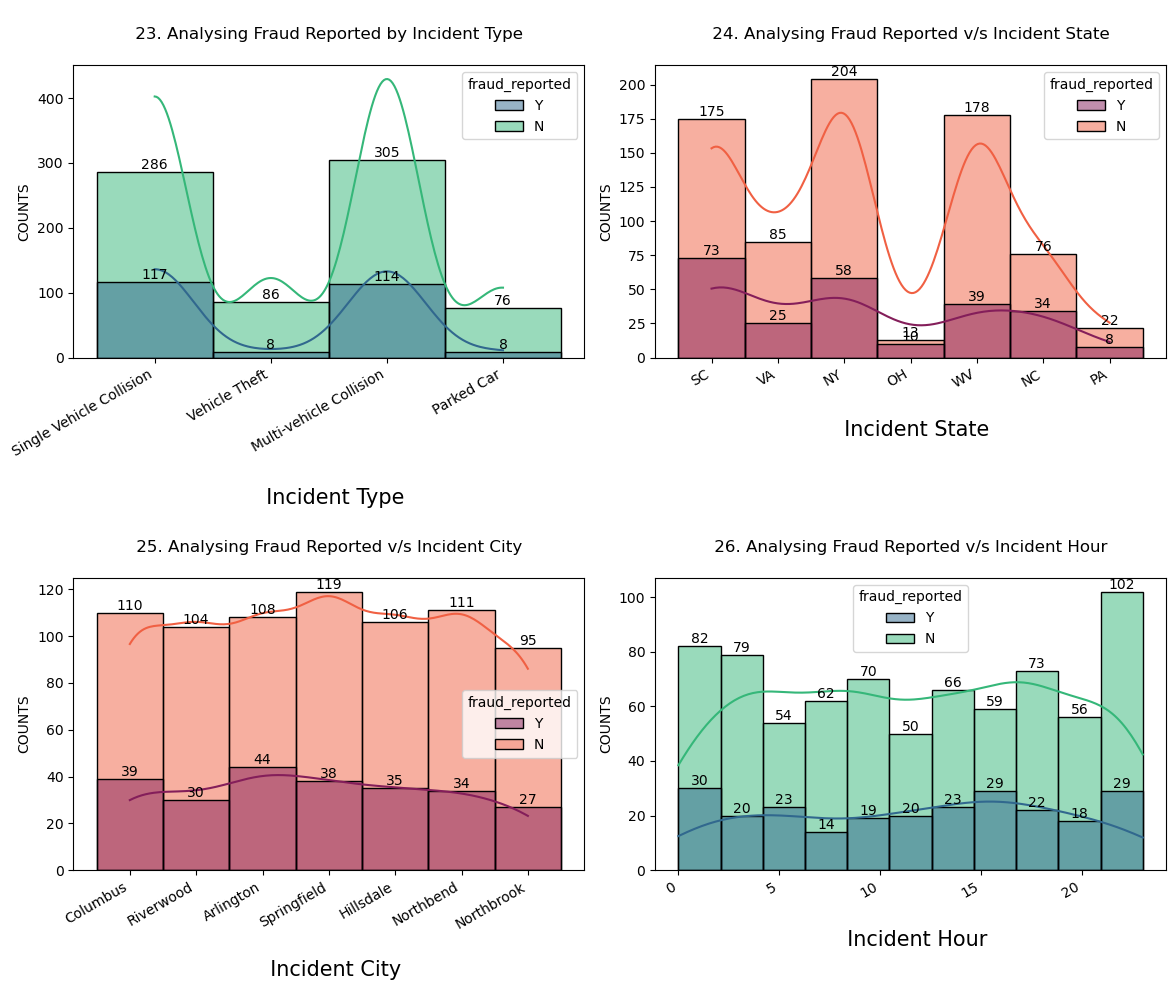

In [154]:
plt.figure (figsize = (12,10), facecolor = "white")

plt.subplot(2,2,1)
plt.title('\n 23. Analysing Fraud Reported by Incident Type \n')
ax=sns.histplot(data=df, x="incident_type", hue="fraud_reported",kde=True,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Incident Type', fontsize=15)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper right',fontsize=10)

# -------------------------------------------------------------------------------------------------

plt.subplot(2,2,2)
plt.title('\n 24. Analysing Fraud Reported v/s Incident State \n')
ax=sns.histplot(data=df, x="incident_state", hue="fraud_reported",kde=True,palette='rocket')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Incident State', fontsize=15)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper left',fontsize=10)

# -----------------------------------------------------------------------------------------------------------

plt.subplot(2,2,3)
plt.title('\n 25. Analysing Fraud Reported v/s Incident City \n')
ax=sns.histplot(data=df, x="incident_city", hue="fraud_reported",kde=True,palette='rocket')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Incident City', fontsize=15)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper left',fontsize=10)

# ----------------------------------------------------------------------------------------------------------

plt.subplot(2,2,4)
plt.title('\n 26. Analysing Fraud Reported v/s Incident Hour \n')
ax=sns.histplot(data=df, x="incident_hour_of_the_day", hue="fraud_reported",kde=True,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)
plt.xlabel('\n  Incident Hour', fontsize=15)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('COUNTS',fontsize=10)
# plt.yticks(rotation=30, ha = 'right')
# plt.legend('upper left',fontsize=10)

# -----------------------------------------------------------------------------------------------------------

plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------------------------------------


==================== BIVARIATE & MULTIVARIATE ANALYSIS COMPLETED UPTO HERE ============================

============== Applying Encoding Techniques ===================

In [155]:
'''
Upto Here our Univariate, Bivariate & Multi-Variate Analysis Part is completed . Now for further More analysis like correlation,
finding Outlier etc we need to ENCODE our dataset first. because in our dataset there are so many columns with datatype='object'
,so we need to ENCODE THEM FIRST.
for this here we are going to apply ENCODING TECHNIQUES.
so here we are applying "LABEL ENCODER" for all 'object' categorical column :-
for which we have to import some libraries
'''

'\nUpto Here our Univariate, Bivariate & Multi-Variate Analysis Part is completed . Now for further More analysis like correlation,\nfinding Outlier etc we need to ENCODE our dataset first. because in our dataset there are so many columns with datatype=\'object\'\n,so we need to ENCODE THEM FIRST.\nfor this here we are going to apply ENCODING TECHNIQUES.\nso here we are applying "LABEL ENCODER" for all \'object\' categorical column :-\nfor which we have to import some libraries\n'

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [157]:
'''
here above we can see that out of all 35 columns, there are 18 columns are of 'object' datatype. And we need encode them for 
further analysis.
'''

"\nhere above we can see that out of all 35 columns, there are 18 columns are of 'object' datatype. And we need encode them for \nfurther analysis.\n"

In [158]:
object_col = []

In [159]:
numeric_col = []

In [160]:
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        object_col.append(i)
    else:
        numeric_col.append(i)
    

In [161]:
print(object_col)
# here we put all 'object' dtype columns into list

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [162]:
'''
# here we can see that 'insured_education_level' is not having much relvance with 'fraud reported'....insted of this ...
# 'insured_occupation' seems more relevance with 'fraud_reported'.
# Because OCCUPATION is matters for the persion who is doing fraud with the insurance company.
# the person with good occupation is having less chances to fraud with insurance company.
# therfore we can drop 'insured_education_level' column from our dataset.
'''

"\n# here we can see that 'insured_education_level' is not having much relvance with 'fraud reported'....insted of this ...\n# 'insured_occupation' seems more relevance with 'fraud_reported'.\n# Because OCCUPATION is matters for the persion who is doing fraud with the insurance company.\n# the person with good occupation is having less chances to fraud with insurance company.\n# therfore we can drop 'insured_education_level' column from our dataset.\n"

In [163]:
df.drop(['insured_education_level'], axis=1, inplace=True)

In [164]:
df.shape

(1000, 33)

In [165]:
object_col.remove("insured_education_level")

In [166]:
print(object_col)

['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


======= NOW APPLYING LABEL ENCODER ON ALL OBJECT COLUMNS ==============

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
le = LabelEncoder()

In [169]:
print(object_col)

['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [170]:
df["policy_state"] = le.fit_transform(df["policy_state"])
df["policy_csl"] = le.fit_transform(df["policy_csl"])
df["insured_sex"] = le.fit_transform(df["insured_sex"])
df["insured_occupation"] = le.fit_transform(df["insured_occupation"])
df["insured_relationship"] = le.fit_transform(df["insured_relationship"])
df["incident_type"] = le.fit_transform(df["incident_type"])
df["collision_type"] = le.fit_transform(df["collision_type"])
df["incident_severity"] = le.fit_transform(df["incident_severity"])
df["authorities_contacted"] = le.fit_transform(df["authorities_contacted"])
df["incident_state"] = le.fit_transform(df["incident_state"])
df["incident_city"] = le.fit_transform(df["incident_city"])
df["property_damage"] = le.fit_transform(df["property_damage"])
df["police_report_available"] = le.fit_transform(df["police_report_available"])
df["auto_make"] = le.fit_transform(df["auto_make"])
df["auto_model"] = le.fit_transform(df["auto_model"])
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])

In [171]:
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,2,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,6,2,0,0,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,11,3,35100,0,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,1,4,48900,-62400,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,11,4,66000,-46000,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0


In [172]:
df.dtypes
# here below now we can see that all of the object datatypes are changed into integer form.

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_occupation               int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount       

============ FINDING CORRELATION IN DATASET ========================

In [173]:
cor = df.corr()
cor

# non graphically finding correlation, here we can see that it is difficult to understand this kind of correlation....
# ....so further we find the correlation graphically by HEAT MAP.

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,0.009814,0.069727,0.006399,0.020209,-0.017377,-0.017824,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.017220,0.074832,-0.007075,0.007368,-0.025626,-0.018672,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.031215,-0.018506,0.074551,-0.030338,0.031848,0.034739,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.015788,-0.030063,0.005249,-0.034612,0.011997,-0.036687,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,-0.046733,-0.022945,0.035212,-0.023544,-0.038411,-0.033182,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,0.035922,0.001925,-0.013738,0.023547,0.053603,0.036719,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,0.023422,0.077495,-0.047268,-0.024056,0.015966,-0.025913,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.056957,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,-0.069077,-0.002355,0.006303,0.049372,-0.010840,-0.045313,-0.023855,-0.017548,-0.047669,-0.017532,0.008274,0.027448,0.060342,0.028695,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,-0.006160,0.002855,-0.020494,-0.021705,0.009952,-0.023310,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.029293,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.069077,-0.006160,1.000000,-0.010171,-0.007824,-0.020171,0.003842,0.006111,0.004731,-0.007811,-0.022761,0.000390,-0.018435,-0.015368,0.010697,-0.000236,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564


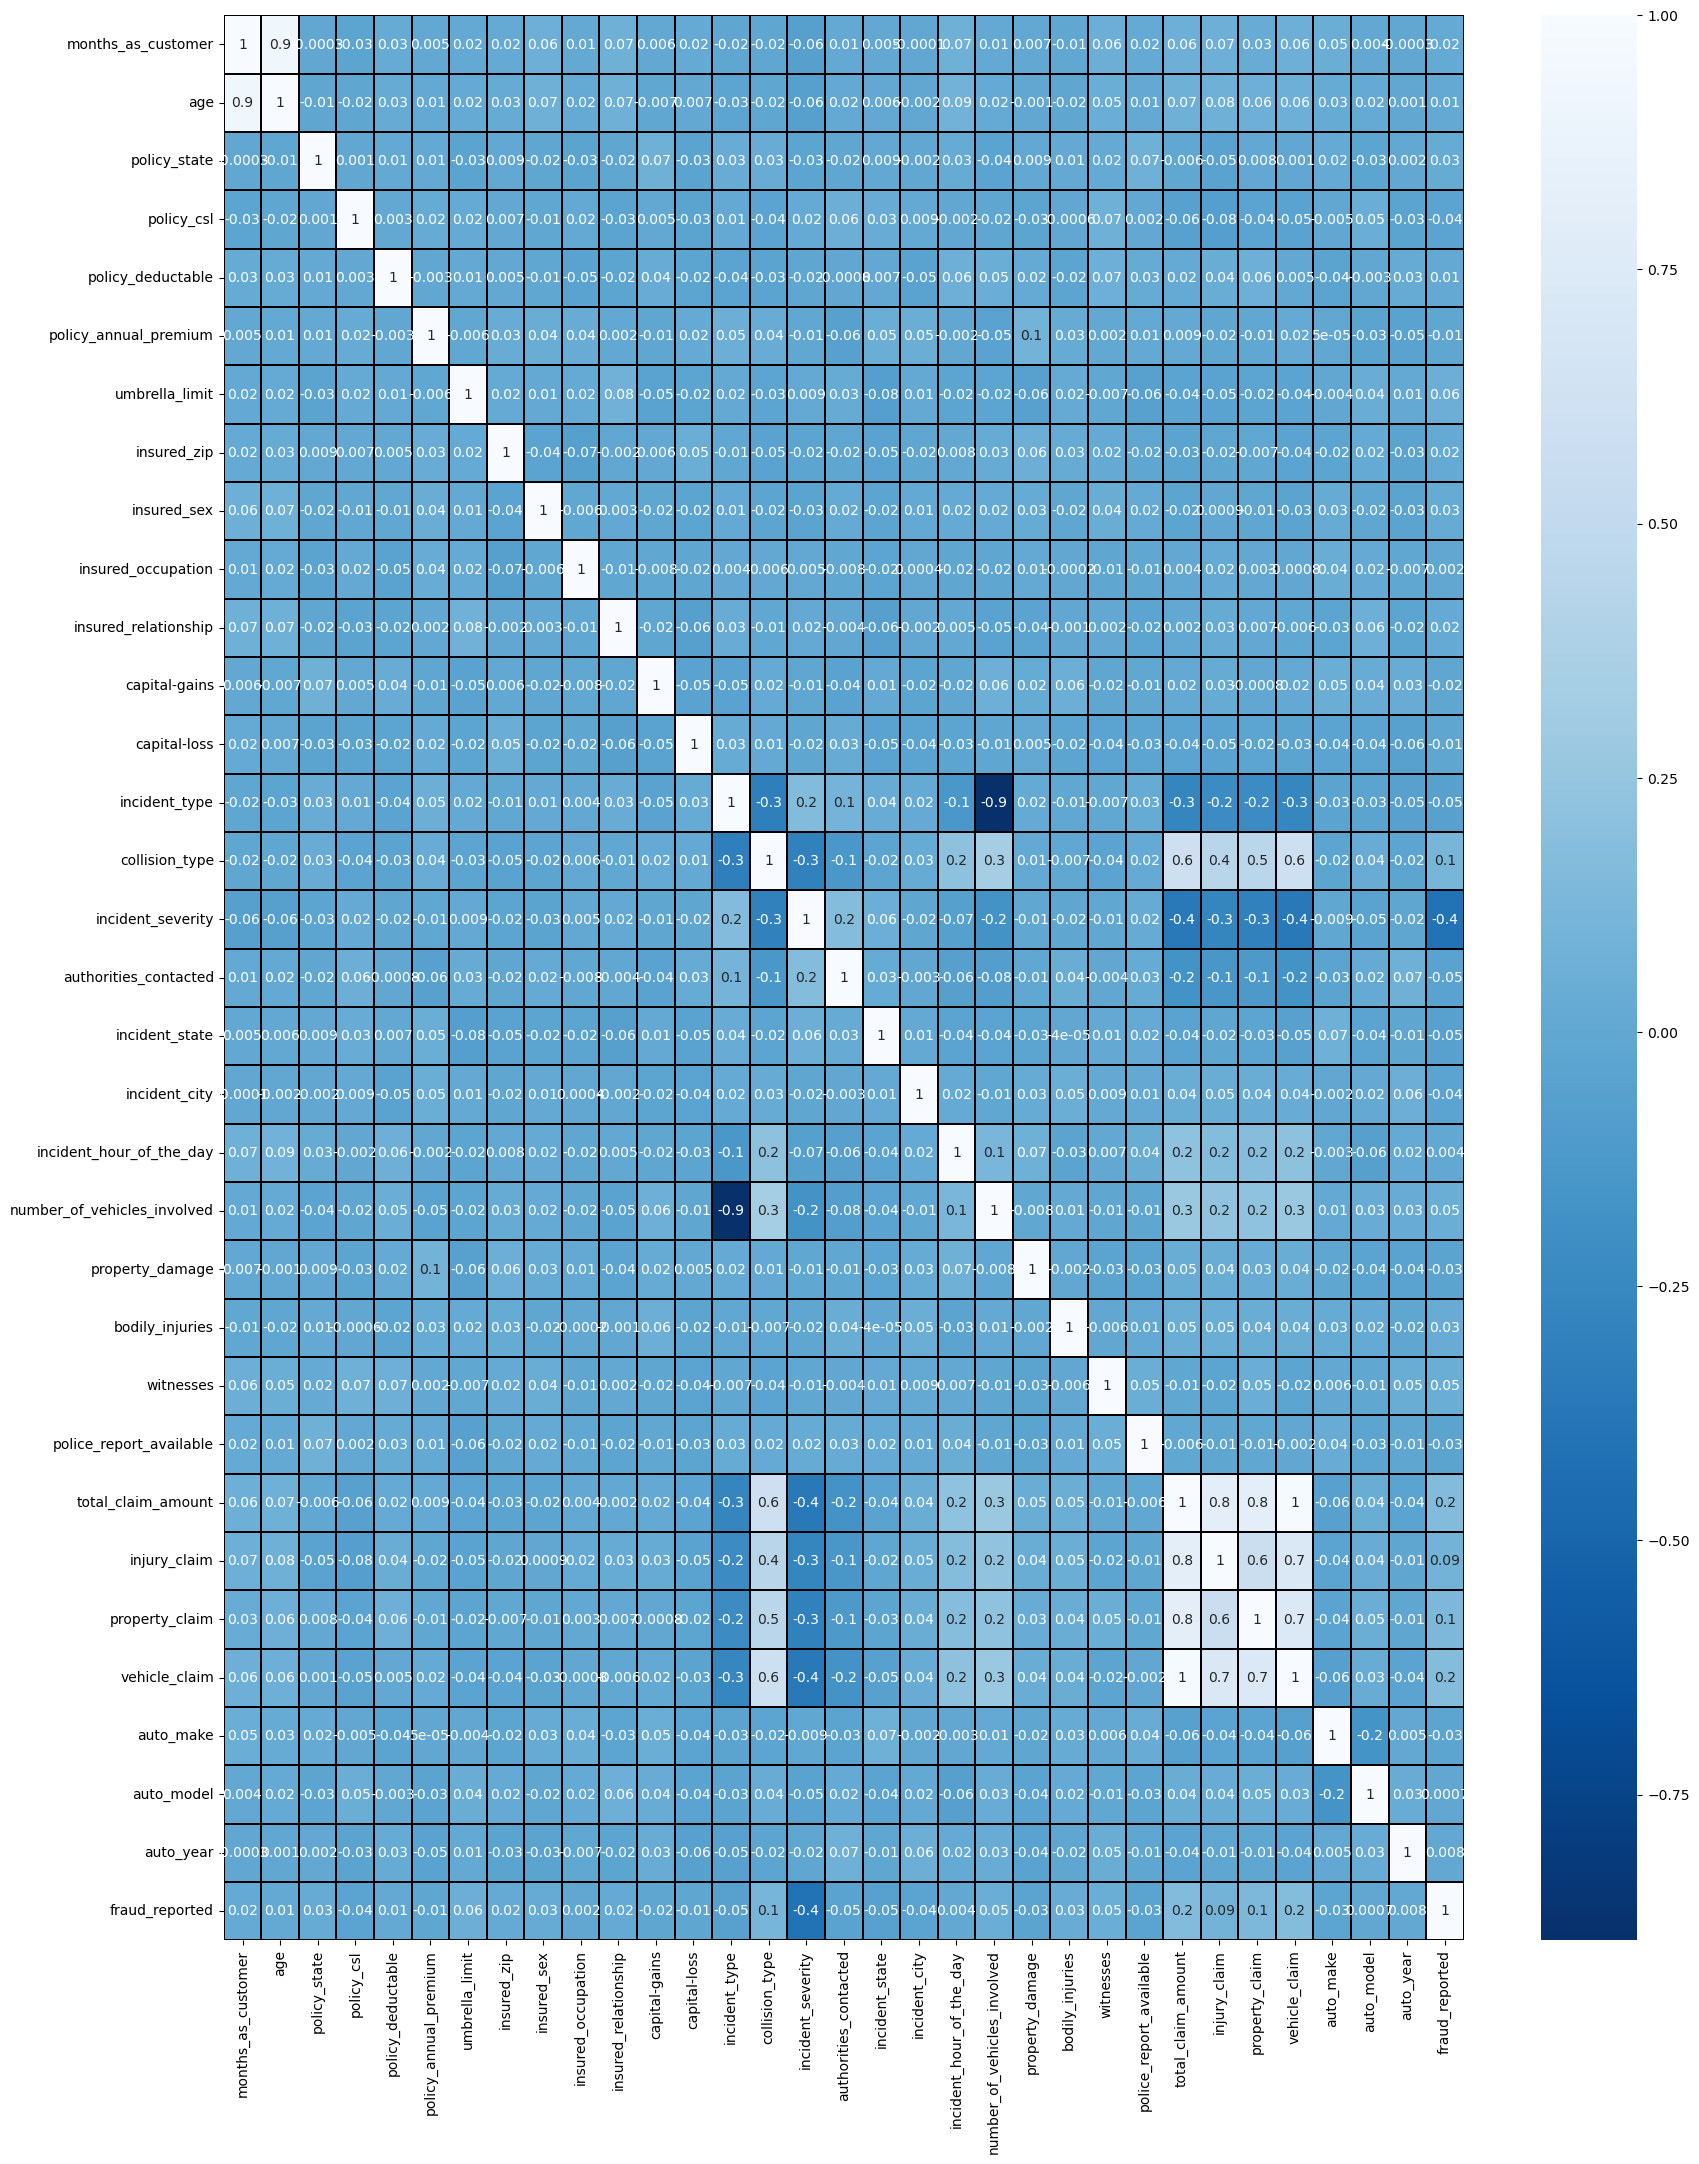

In [174]:
plt.figure (figsize = (20,25), facecolor = "white")
sns.heatmap(df.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.xticks(rotation=90);
plt.yticks(rotation=0);
plt.show()


In [175]:
'''
Here from the aobve correlation graph we can find that ['Total claim amount, injury claim, property claim, & vehicle claim']
are highly correlated with each other.
there is no such any column which is majorly correlated with target column [Fraud Reported]
we can also check is individually
'''

"\nHere from the aobve correlation graph we can find that ['Total claim amount, injury claim, property claim, & vehicle claim']\nare highly correlated with each other.\nthere is no such any column which is majorly correlated with target column [Fraud Reported]\nwe can also check is individually\n"

In [176]:
cor['fraud_reported'].sort_values(ascending=False)

'''Here from the below table we can find that the Highest correlation is "Vehicle claim" with only 0.17 with the
target column "Fraud Reported"
Sor there is no such high correlation of any column with the target column.
'''

'Here from the below table we can find that the Highest correlation is "Vehicle claim" with only 0.17 with the\ntarget column "Fraud Reported"\nSor there is no such high correlation of any column with the target column.\n'

CHECKING FOR OUTLIERS ======================================================================================================

In [177]:
df.describe()
# here in the describe methode we are getting soo many STATISTICAL INFORMATION about the dataset for each column.
# 1. first of all above we are getting 'count' for each of the column.
#                 as we know the total number of row counts for each column is 18,249. and here we are getting count for each..
#                 ... column is smame. not a single blank/'nan' is present in any of the column.

# 2. MEAN : In this, we can get MEAN VALUE for the every column.
# 3. STD : which is Standard Deviation , which shows that how the data of the column is deviate from its MEAN.
# 4. MIN : It shows the Minimum value present in the column.
# 5. 25% : It gives us the 25th Percentile Value in the column.
# 6. 50% : It gives us the 50th Percentile Value in the column.
# 7. 75% : It gives us the 75th Percentile Value in the column.
# 8. Max : It gives us the MAXIMUM VALUE present the column.

# As If in any column the Difference between the value at 75th Percentile & MAX is Higher then, there may be presence of outlier
# so we have to check the 75th% & MAX for each of the column.


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,6.653000,2.416000,25126.100000,-26793.700000,1.172000,1.666000,1.184000,2.167000,3.242000,2.966000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,4.019048,1.681003,27872.187708,28104.096686,1.081474,1.063755,0.939695,1.532142,2.155942,2.044266,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,3.000000,1.000000,0.000000,-51500.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,7.000000,2.000000,0.000000,-23250.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,10.000000,4.000000,51025.000000,0.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,13.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [178]:
'''
here in the above table we can find difference in 75% & MAX in the following columns, so there may may be presence of OUTLIER
in those columns.
* months_as_customer,  *policy_annual_premium,  *capital_gains,  * Total_claim_amount,  *Injury_claim,  *Property_claim
*vehicle_claim.

in above 7 columns there is huge difference between 75% & Maximum  so we need more focus on those columns while cheking outliers.
'''

'\nhere in the above table we can find difference in 75% & MAX in the following columns, so there may may be presence of OUTLIER\nin those columns.\n* months_as_customer,  *policy_annual_premium,  *capital_gains,  * Total_claim_amount,  *Injury_claim,  *Property_claim\n*vehicle_claim.\n\nin above 7 columns there is huge difference between 75% & Maximum  so we need more focus on those columns while cheking outliers.\n'

In [179]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [180]:
df1 = df[['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported']]

In [181]:
df.columns.nunique()
# there are 33 no. of unique columns are present in the dataset.
#  by using forloop we can chek outliers for each column in a single code.

33

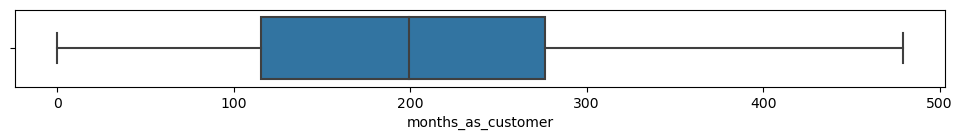

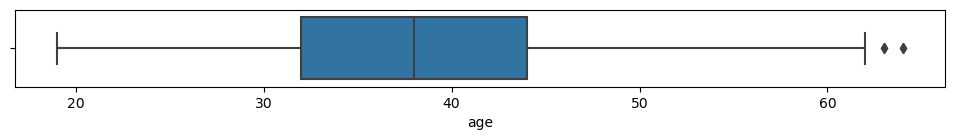

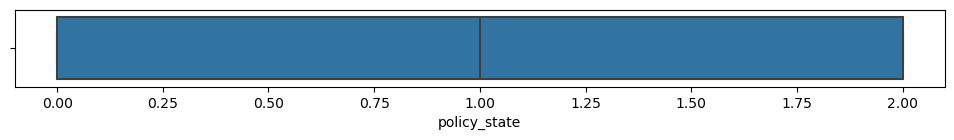

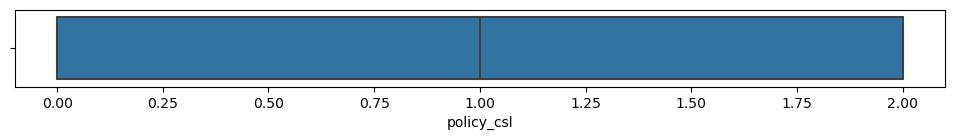

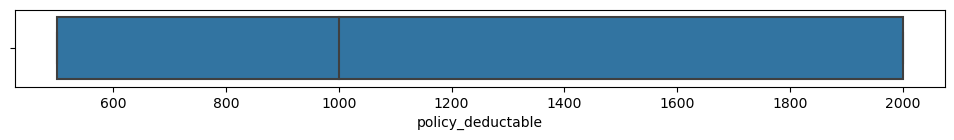

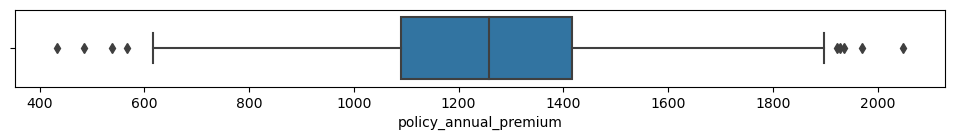

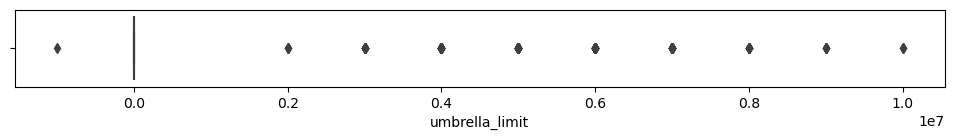

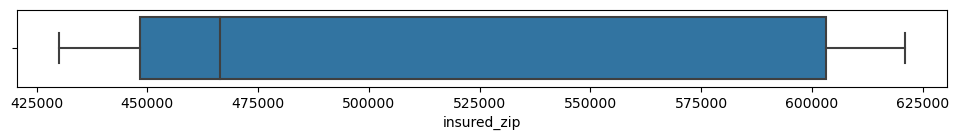

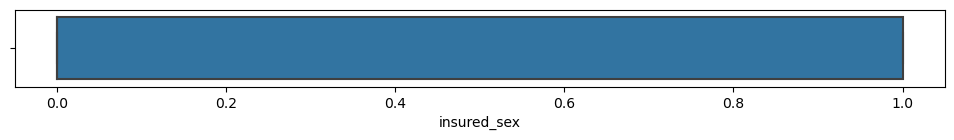

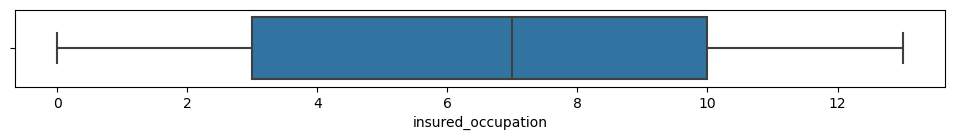

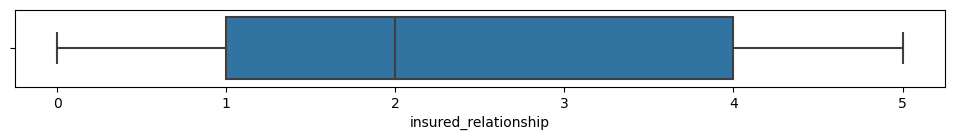

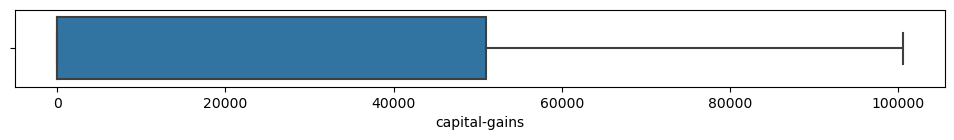

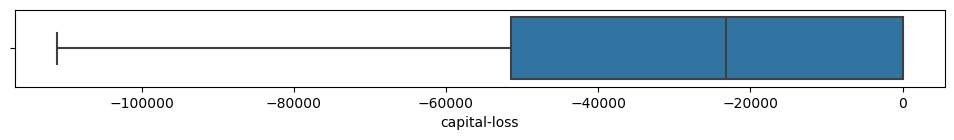

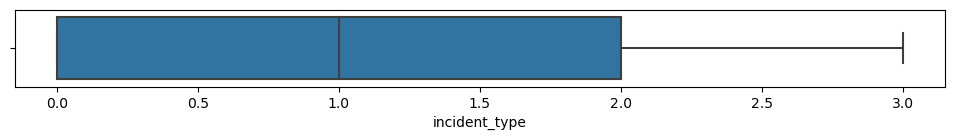

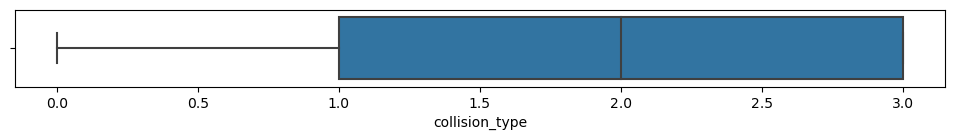

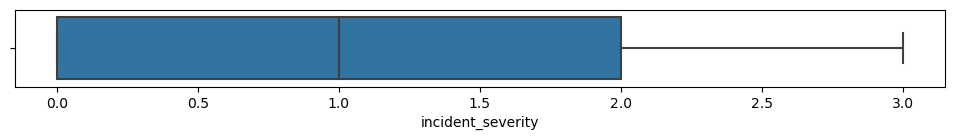

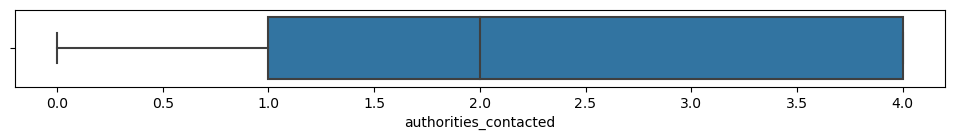

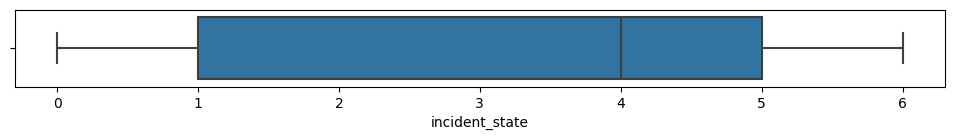

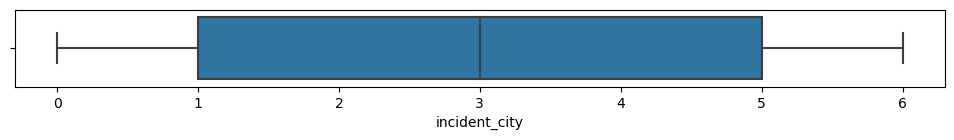

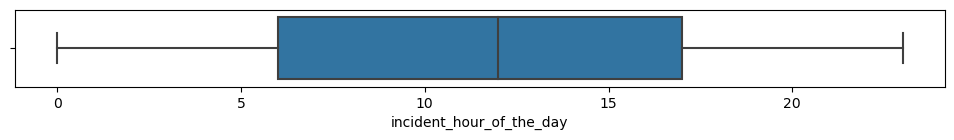

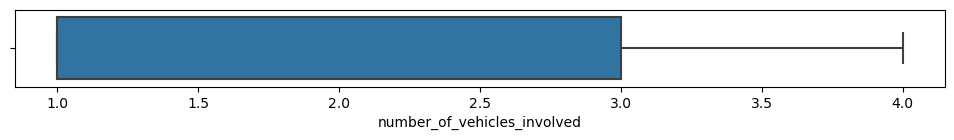

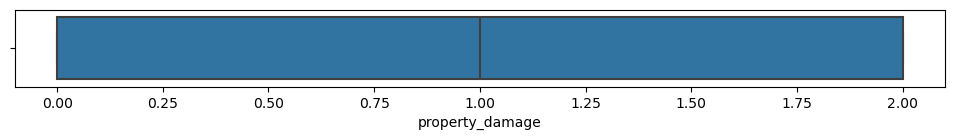

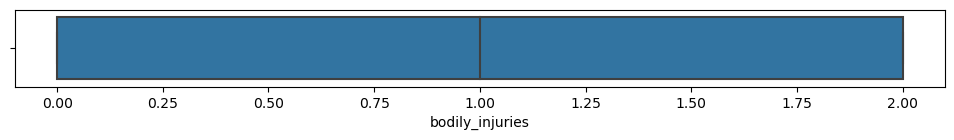

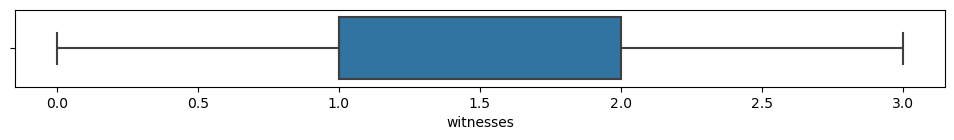

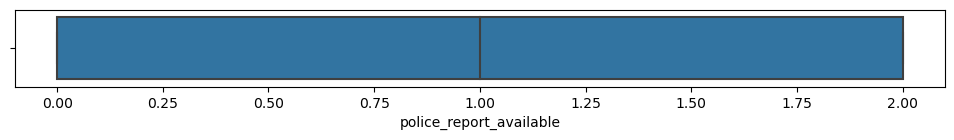

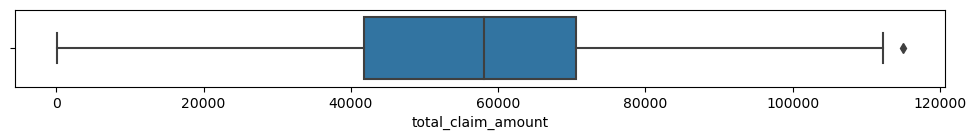

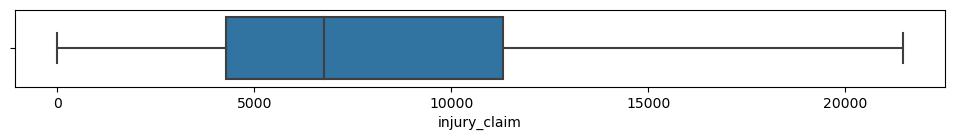

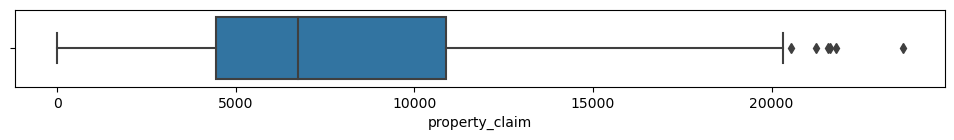

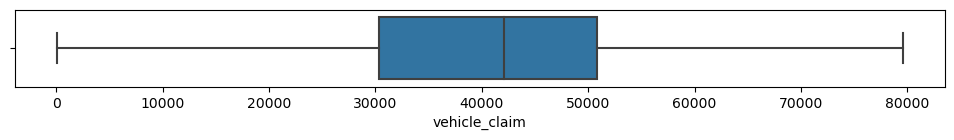

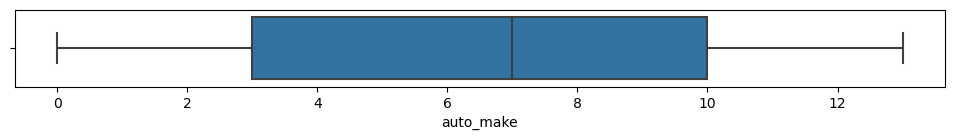

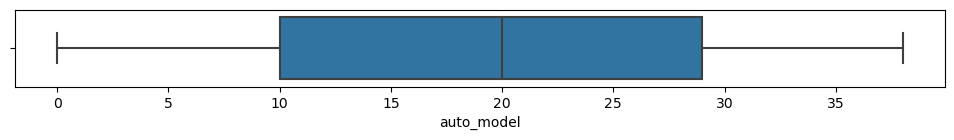

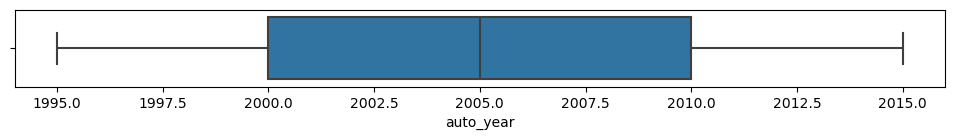

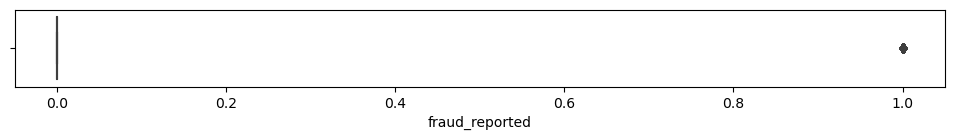

In [182]:
for i in df1.columns[0:33]:
    plt.figure (figsize = (12,1), facecolor = "white")
    sns.boxplot(x=i,data=df1)
    plt.show()
    
#  here below we can find the outliers for all the cloumns by using boxplot.
#  and we are found outliers in :
#  age, policy_annual_premium, Total_claim_amount, Property_Claim, are having outliers.
# so out of 33 columns we found OUTLIERS IN 4 COLUMNS , now we have to remove those outliers from out dataset.

========== REMOVING OF OUTLIERS BY USING Z-SCORE METHOD  ====================

In [183]:
#  we can not remove outliers from out TARGET COLUMN, so first we have to seprate target column first.
# For this first we need to identify the ZSCORE VALUES, for which we have to import some libraries.

In [184]:
from scipy.stats import zscore

In [185]:
z = np.abs(zscore(df1))
z.head(5)

# by applying 'abs' (absolute method), we are getting all the entries whose z-score value is positive side
#  Ideally we can call the OUTLIERS whos ZSCORE VALUE is LESS THEN 3 AND MORE THEN 3
# so we have to remove all the data whose ZSCORE >3 & <3
#  below here we apllying "abs" i.e absolute method it returns us the all zscore values greater then 3
#  so we just need to remove lesserr then 3 zscore values.

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.078140,0.990836,1.187173,0.060937,0.222383,0.616705,0.479476,0.489529,1.076953,1.158316,1.437957,1.011331,0.953851,0.766005,1.254675,1.260614,1.196963,0.351762,0.962196,0.956261,0.823865,1.303656,0.009759,0.461838,1.270313,0.714257,0.189283,1.165505,0.749653,0.856466,1.645743,0.183440,1.746019
1,0.208995,0.334073,0.016856,0.060937,1.412784,0.242521,1.697980,0.461008,1.076953,0.162558,0.247595,0.901927,0.953851,1.691132,1.566933,0.195906,1.196963,0.815829,0.995476,0.524475,0.823865,1.160722,1.210174,1.338700,1.198712,1.807312,1.363822,1.372696,1.823346,0.360539,0.657470,0.315491,1.746019
2,0.608002,1.088913,1.187173,1.182668,1.412784,0.642233,1.697980,0.984885,0.928546,1.082141,0.347586,0.358023,0.953851,1.084249,0.314139,0.195906,1.196963,1.040437,0.962196,0.668404,1.140056,0.071467,1.229693,1.362107,0.035801,0.686362,0.054644,0.736072,0.785565,0.631315,0.959702,0.315491,0.572731
3,0.452355,0.224613,1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,0.928546,1.407256,0.942766,0.853388,1.267577,0.766005,0.626397,1.260614,1.196963,0.576371,1.451614,0.956261,0.823865,1.160722,0.009759,0.461838,0.035801,0.403135,0.224130,0.219722,0.677607,0.879279,1.319074,1.479664,1.746019
4,0.208995,0.552994,1.220886,1.304542,0.222383,1.341980,2.133471,1.527808,1.076953,1.082141,0.942766,1.467210,0.683741,1.691132,1.566933,0.195906,0.109052,1.040437,1.451614,1.202666,0.823865,0.071467,1.210174,0.438431,0.035801,1.753121,1.257232,1.399654,1.768252,1.623169,1.049545,0.648112,0.572731


In [186]:
threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 27,  6,  6,  6,  5, 12,
        6,  6,  6], dtype=int64))


In [187]:
# here above we found only 20 outliers,  whose z-score is more then > 3 
# i.e means we are having 20 outlier still present in our dataset, and we have to remove those outliers

In [188]:
df_new = df1[(z<3).all(axis=1)]
df_new

# here we can see the difference clearly that, earlier there was 1000 total rows are there, and now after removing outliers..
# ...there are only 980 rows are present in our dataset.
# so there are  20 OUTLIERS are removed during this process.

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,2,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,6,2,0,0,3,0,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,11,3,35100,0,0,2,1,4,1,1,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,1,4,48900,-62400,2,1,0,4,2,0,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,11,4,66000,-46000,3,0,1,2,1,0,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,431289,0,2,4,0,0,2,1,1,1,0,4,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,1436.79,0,608177,0,9,5,70900,0,2,2,0,1,4,3,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,1383.49,3000000,442797,0,1,2,35100,0,0,3,1,4,0,0,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,1356.92,5000000,441714,1,5,5,0,0,2,2,0,3,1,0,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0


In [189]:
df1.shape

(1000, 33)

In [190]:
df_new.shape

(980, 33)

In [191]:
# total 20 outliers are removed successfully.

===============CHECKING REMOVAL OF OUTLIERS BY BOXPLOT (COMPARING  'df1'  &  'df_new') ========================

In [192]:
df_new.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [193]:
#  age, policy_annual_premium, Total_claim_amount, Property_Claim, are having outliers.

In [194]:
# Analysing BEFORE & AFTER REMOVAL OF OUTLIERS (column by column) =====>>>>

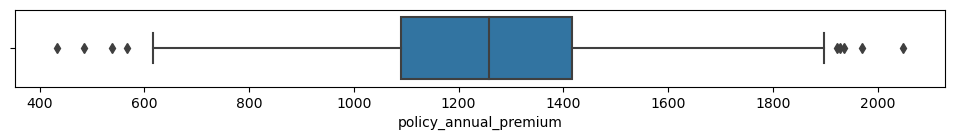

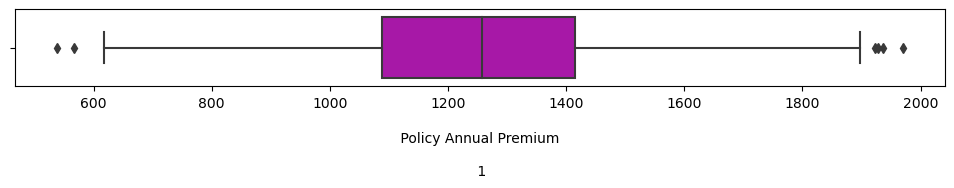

In [195]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='policy_annual_premium',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='policy_annual_premium',data=df_new, color='m')
plt.xlabel('\n Policy Annual Premium \n\n 1')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

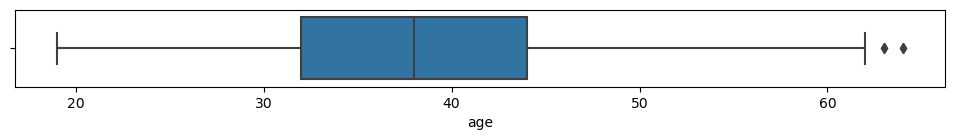

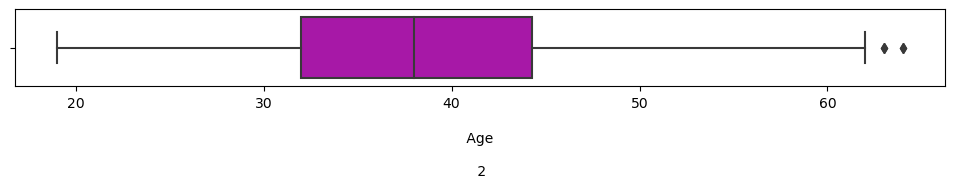

In [196]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='age',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='age',data=df_new, color='m')
plt.xlabel('\n Age \n\n 2')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  NO OUTLIERS ARE REMOVED.
# there is no such presence of outliers

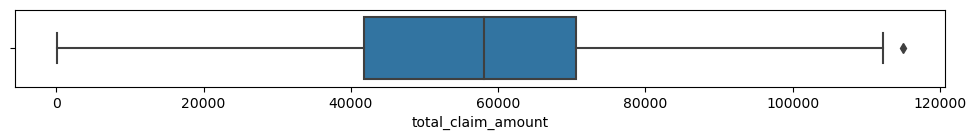

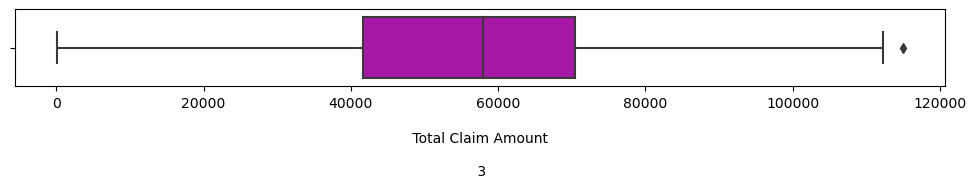

In [197]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='total_claim_amount',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='total_claim_amount',data=df_new, color='m')
plt.xlabel('\n Total Claim Amount \n\n 3')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  NO OUTLIERS ARE REMOVED.

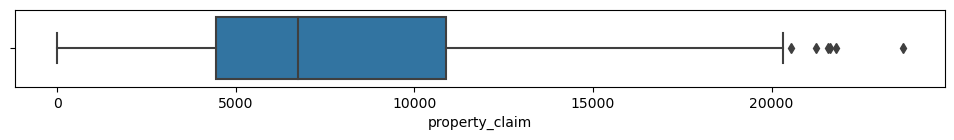

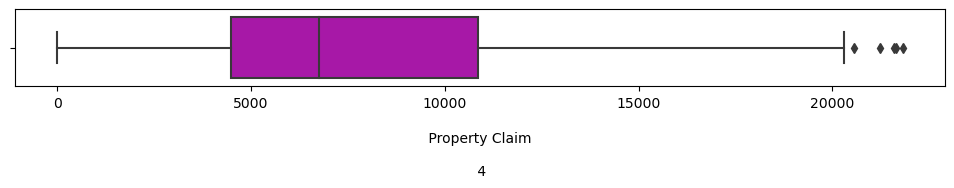

In [198]:
plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='property_claim',data=df1)
plt.show()

# it is the EARLIER (df dataset) WITH PRESENCE OF OUTLIERS

plt.figure (figsize = (12,1), facecolor = "white")
sns.boxplot(x='property_claim',data=df_new, color='m')
plt.xlabel('\n Property Claim \n\n 4')
plt.show()

# outliers are succesfully removed.
# it is the Newer (df_new dataset)  OUTLIERS ARE REMOVED.
# So as we can see , outlier which is removed above by Z-SCORE METHOD is from column.

In [199]:
'''
CONCLUSION :- That Means all 20 Outliers are succefully removed from 2 columns : Total Annual Premium & Property Claim
'''

'\nCONCLUSION :- That Means all 20 Outliers are succefully removed from 2 columns : Total Annual Premium & Property Claim\n'

=========================CHECKING SKEWNESS  ======================================================

In [200]:
# the skewness shows the distribution of data, if the data is widely skewed that means it is not good for our model.
#  ideal range of skewness is ( -0.5 to +0.5)
# We can't remove skewness from our Target Column

In [201]:
df_new.skew()

# here below we didnt find any skewness in the data,
# there is little skewness is present in ' Umbrella Limit', but we didnt remove it.
# because as we seen earlier that UMBRELLA LIMIT is playing an importatnt role with 'Fraud Reported'

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.101196
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.044659


DIVIDING DATA INTO INDEPENDENT & TARGET VARIABLE ===================================================================================================================

In [202]:
df_new.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [203]:
x1 = df_new[['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year']]


In [204]:
y1= df_new[['fraud_reported']]

In [205]:
print(x1.shape)
print(y1.shape)

(980, 32)
(980, 1)


 APPLYING SCALING TECHNIQUES ==================================================================================================================>>>>>>

In [206]:
# here we need to apply scaling techniques on our dataset,by scaling techniques we normalise the values.
#  we can't apply SCALING TECHNIQUES on TARGET VARIABLE
#  to aplly scaling techinuque we need to import some libraries first.

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
st = StandardScaler()

In [209]:
x1 = st.fit_transform(x1)
x1

array([[ 1.06956809,  0.98335151,  1.17982066, ...,  0.85195935,
        -1.64044692, -0.18859446],
       [ 0.20272605,  0.32971067, -0.0245796 , ...,  0.35527871,
        -0.65173967,  0.31047639],
       [-0.61210547, -1.08651116,  1.17982066, ..., -0.63808258,
         0.96614491,  0.31047639],
       ...,
       [-0.64677915, -0.54181045,  1.17982066, ...,  1.10029967,
        -0.02256234, -1.51945005],
       [ 2.19646275,  2.50851348, -1.22897986, ..., -1.38310355,
        -1.28091701, -1.18673615],
       [ 2.17912591,  2.2906332 ,  1.17982066, ...,  0.35527871,
        -0.65173967,  0.31047639]])

In [210]:
xf1 = pd.DataFrame(data=x1)
print(xf1)

# here we get our dataset (xf1) after applying SCALING TECHING (STANDARD SCALER)


           0         1         2         3         4         5         6   \
0    1.069568  0.983352  1.179821  0.067231 -0.224643  0.620031 -0.467878   
1    0.202726  0.329711 -0.024580  0.067231  1.412161 -0.248448  1.890767   
2   -0.612105 -1.086511  1.179821 -1.175916  1.412161  0.645834  1.890767   
3    0.445442  0.220771 -1.228980  0.067231  1.412161  0.656603  2.362496   
4    0.202726  0.547591 -1.228980  1.310379 -0.224643  1.353117  2.362496   
..        ...       ...       ...       ...       ...       ...       ...   
975 -1.747669 -0.106050  1.179821  1.310379 -0.224643  0.221970 -0.467878   
976  0.696826  0.220771 -1.228980 -1.175916 -0.224643  0.743786 -0.467878   
977 -0.646779 -0.541810  1.179821  0.067231 -1.043045  0.523032  0.947309   
978  2.196463  2.508513 -1.228980  1.310379  1.412161  0.412986  1.890767   
979  2.179126  2.290633  1.179821  0.067231 -0.224643 -2.033657 -0.467878   

           7         8         9         10        11        12        13  

In [211]:
xf1.columns

RangeIndex(start=0, stop=32, step=1)

In [212]:
column = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year']

In [213]:
xf1.columns = column

In [214]:
yf1 = y1

In [215]:
xf1.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year'],
      dtype='object')

In [216]:
yf1.head(2)

,fraud_reported
0,1
1,1


In [217]:
print(xf1.shape)
print(yf1.shape)


(980, 32)
(980, 1)


FINDING MULTICOLINEARITY ======================================================================================================================

In [218]:
# We have to find the multicollinearity between the features and to remove it we can use VIF (VARIANCE INFLATION FACTOR)
# we can not apply VIF on the TARGET COLUMN
# for apllyin VIF we have to import some libraries as follows

In [219]:
import statsmodels.api as sm
from scipy import stats
from statsmodels .stats.outliers_influence import variance_inflation_factor

In [220]:
# here we are making "def function" for calculating VIF 
def calc_vif(xf1):
    vif = pd.DataFrame()
    vif["FETURES"] = xf1.columns
    vif["VIF FACTOR"] = [variance_inflation_factor(xf1.values,i) for i in range (xf1.shape[1])]
    return (vif)

In [221]:
calc_vif(xf1)
# here we can't find any HIGHER Multicolinearity in our dataset

,FETURES,VIF FACTOR
0,months_as_customer,6.884520
1,age,6.915695
2,policy_state,1.026630
3,policy_csl,1.026459
4,policy_deductable,1.040094
5,policy_annual_premium,1.036669
6,umbrella_limit,1.034562
7,insured_zip,1.035764
8,insured_sex,1.026477
9,insured_occupation,1.018108


In [222]:
'''
here above we can see that 'total_claim_amount','injury_claim','property_claim','vehicle_claim' are highly correlated with each 
other & this highly correlation can affect the efficiency of our model. so we need drop a column between them.
'Total_claim_amount' is the aggregation of all three injury,property & vehicle claims. so we can drop the 'total_claim_amount'
and then again we can chek VIF VALUE.
'''

"\nhere above we can see that 'total_claim_amount','injury_claim','property_claim','vehicle_claim' are highly correlated with each \nother & this highly correlation can affect the efficiency of our model. so we need drop a column between them.\n'Total_claim_amount' is the aggregation of all three injury,property & vehicle claims. so we can drop the 'total_claim_amount'\nand then again we can chek VIF VALUE.\n"

In [223]:
xf1.drop(['total_claim_amount'],axis=1,inplace=True)

In [224]:
calc_vif(xf1)


,FETURES,VIF FACTOR
0,months_as_customer,6.884520
1,age,6.915695
2,policy_state,1.026630
3,policy_csl,1.026459
4,policy_deductable,1.040094
5,policy_annual_premium,1.036669
6,umbrella_limit,1.034562
7,insured_zip,1.035764
8,insured_sex,1.026477
9,insured_occupation,1.018108


In [225]:
'''
HERE ABOVE WE CAN CLEALRY SEE THE DIFFERENCE

Now there is not much any higher VIF VALUE that means our dataset is not MULTICOLLINEARED NOW
and we can apply the further operations on our dataset for the prediction.
'''

'\nHERE ABOVE WE CAN CLEALRY SEE THE DIFFERENCE\n\nNow there is not much any higher VIF VALUE that means our dataset is not MULTICOLLINEARED NOW\nand we can apply the further operations on our dataset for the prediction.\n'

RESAMPLING TECHNIQUE (APPLYING SMOTE) ========================================================================================================

In [226]:
# Here we know that our Target Column is a Categorical column. which is having values from 0-1.
# so we have to chek the distribution of values are equal or not, offcourse i would be not, so we have to make them equally
#  'equally balanced distributed' for better results.

# SOLVING CLASS IMMBALANCE PROBLEM BY SMOTE TECHNIQUE.

In [227]:
yf1.value_counts()

fraud_reported
0                 740
1                 240
dtype: int64

In [228]:
# To solve this prolem we need import SMOTE LIBRARY from the IMBLEARN.

In [229]:
from imblearn.over_sampling import SMOTE

In [230]:
smt = SMOTE()

In [231]:
trainx, trainy = smt.fit_resample(xf1,yf1)

In [232]:
trainy.value_counts()
# here as you can see below the immbalancenes is cleared now.
# and now our Target Column Categories are BALANCED NOW.

fraud_reported
0                 740
1                 740
dtype: int64

In [233]:
print(trainx.shape)
print(trainy.shape)

(1480, 31)
(1480, 1)


================  UPTO HERE EDA AND OTHER TECHINIQUES ARE COMPLETED ==================================

=============================== NOW WE NEED TO APPLY ML MODELS ======================================================

In [234]:
trainy.nunique()

fraud_reported    2
dtype: int64

In [235]:
# here above as we know that our target column is CATEGORICAL and having 2 values = 0, 1
# therefore it as an CLASSIFICATION PROBLEM. and we need to apply classification Ml Algorithm

========= Applying Train Test Split ===================

In [236]:
#  Applying TRAIN_TEST_SPLIT ====>>>
#  IMPORTING SOME IMPORTANT REQUIIRED LIBRARIES

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [239]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [240]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [241]:
model = [lg,gnb,svc,dtc,knn]

In [242]:
#  1) FINDING BEST RANDOM STATE & Model===>

In [243]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    for m in model:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",m)

Best accuracy is 0.75 at random state 187
with Best Fitted Model is : KNeighborsClassifier()


In [244]:
'''Here above we found the BEST RANDOM STATE IS = 187,  For KNEIGHBORS CLASSIFIER MODEL. with the ACCURACY OF  74 % '''

'Here above we found the BEST RANDOM STATE IS = 187,  For KNEIGHBORS CLASSIFIER MODEL. with the ACCURACY OF  74 % '

In [245]:
'''NOW WE HAVE TO CHECK PERFORMANCE OF MODELS INDIVIDUALLY '''

'NOW WE HAVE TO CHECK PERFORMANCE OF MODELS INDIVIDUALLY '

INDIVIDUAL CHECK OF MODEL-1 =====

In [246]:
#  2) Applying LOGISTIC REGRESSION MODEL & FINDING BEST RANDOM STATE ===>

In [247]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",lg)
# here the with LOGISTIC REGRESSION MODEL- Accuracy is =78 %  &  Best Random State is = 17
# here we can see that the ACCURACY is also increased with finding BEST RANDOM STATE for the model.

Best accuracy is 0.7804054054054054 at random state 153
with Best Fitted Model is : LogisticRegression()


INDIVIDUAL CHECK OF MODEL-2 =====

In [248]:
# 3) Applying GGAUSSIAN-NB Model & FINDING BEST RANDOM STATE FOR THE MODEL======>>>

In [249]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    pred = gnb.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",gnb)

# here the with GAussian NB-MODEL- Accuracy is =78 %  &  Best Random State is = 4
# here we find that ACCURACY is also increased with FINDING BEST RANDOM STATE

Best accuracy is 0.8006756756756757 at random state 153
with Best Fitted Model is : GaussianNB()


INDIVIDUAL CHECK OF MODEL-3 =====

In [250]:
# 4) Applying Support Vector Classifier Model & Finding Best Random State For it =====>>>>

In [251]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    svc = SVC()
    svc.fit(x_train,y_train)
    pred = svc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",svc)

# here the with Support Vector Classifier-MODEL- Accuracy is =92 %  &  Best Random State is = 158
# here we find that ACCURACY is changed with FINDING BEST RANDOM STATE

Best accuracy is 0.9054054054054054 at random state 23
with Best Fitted Model is : SVC()


INDIVIDUAL CHECK OF MODEL-4 =====

In [252]:
# 5) Applying Decision Tree Classifier Model & Findig Best Random State for it =========>>>>

In [253]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",dtc)

# here the with Decision Tree Classifier-MODEL- Accuracy is =84 %  &  Best Random State is = 111
# here we find that ACCURACY is changed with FINDING BEST RANDOM STATE

Best accuracy is 0.8547297297297297 at random state 32
with Best Fitted Model is : DecisionTreeClassifier()


INDIVIDUAL CHECK OF MODEL-5 ====

In [254]:
# 6) Applying KNearest Neighbour Model & Finding Best Random State For it =====>>>>

In [255]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = accuracy_score(y_test,pred)
    
    if acc > maxaccu :
        maxaccu = acc
        maxrs = i
        
print ("Best accuracy is",maxaccu, "at random state", maxrs)
print ("with Best Fitted Model is :",knn)

# here the with KNeighbors Classifier-MODEL- Accuracy is =75 %  &  Best Random State is = 187
# here we find that ACCURACY is changed with FINDING BEST RANDOM STATE

Best accuracy is 0.75 at random state 187
with Best Fitted Model is : KNeighborsClassifier()


In [256]:
#  After Applying Above 5 Classification ML Models we are getting following accuracies :
# lg = LogisticRegression()        = accuracy-78 %   with  Best Random State- 17
# gnb = GaussianNB()               = accuracy-78 %   with  Best Random State- 4
# svc = SVC()                      = accuracy-92 %   with  Best Random State- 158
# dtc = DecisionTreeClassifier()   = accuracy-85 %   with  Best Random State- 86
# knn = KNeighborsClassifier()     = accuracy-75 %   with  Best Random State- 187

#  so from the above accuracies we can find that the best working model is SVC() with = 92 % accuracy
# so we can apply SVC() as a FINAL MODEL

========APPLYING SVC (SUPPRT VECTOR CLASSIFIER AS A FINAL MODEL) ==============

In [257]:
final_model = SVC()

In [270]:
x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.20,random_state=158)
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(accuracy_score(y_test,final_model_pred))
print(confusion_matrix(y_test,final_model_pred))
print(classification_report(y_test,final_model_pred))

# here SUPPORT VECTOR CLASSIFIER as FINAL MODEL with ACCURACY OF = 88 %

0.8817567567567568
[[128  25]
 [ 10 133]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       153
           1       0.84      0.93      0.88       143

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.89      0.88      0.88       296



In [259]:
# Making 'def' function to CHECK / VERIFY samples :

In [260]:
xf1.shape

(980, 31)

In [261]:
def pred_func(inc):
    inc= inc.reshape(1,31)
    fraud_detection = final_model.predict(inc)
    print(fraud_detection)
    
    if fraud_detection == 0:
        print("No Fraud Found")
    elif (fraud_detection == 1):
        print ("Yes Fraud Found")
    else:
        print('Not Known')
# making 'def' function to predict Attrition .

In [262]:
pd.set_option('display.max_columns', None)
xf1

# here by making 'display.max_columns' we can see all the 31 columns of dataset.

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.069568,0.983352,1.179821,0.067231,-0.224643,0.620031,-0.467878,-0.484014,1.071971,-1.156087,-1.437247,1.003849,0.955432,0.761515,1.255471,-1.259947,1.198446,0.351070,-0.973760,-0.960633,-0.820087,1.298516,0.002498,0.466378,1.266345,-0.187627,1.176015,0.753824,0.851959,-1.640447,-0.188594
1,0.202726,0.329711,-0.024580,0.067231,1.412161,-0.248448,1.890767,-0.455363,1.071971,-0.160292,-0.248136,-0.906228,0.955432,1.687428,-1.568619,-0.195509,1.198446,0.814748,0.990800,-0.529777,-0.820087,-1.162887,-1.221626,-1.333033,-1.205803,-1.361005,-1.378984,-1.824679,0.355279,-0.651740,0.310476
2,-0.612105,-1.086511,1.179821,-1.175916,1.412161,0.645834,1.890767,-0.981629,-0.932861,1.084451,0.346420,0.351628,0.955432,-1.090309,0.314108,-0.195509,1.198446,-1.039963,-0.973760,-0.673396,1.144914,0.067814,1.226623,1.366083,0.030271,0.056059,-0.738147,-0.784678,-0.638083,0.966145,0.310476
3,0.445442,0.220771,-1.228980,0.067231,1.412161,0.656603,2.362496,1.506233,-0.932861,-1.405036,0.940975,0.846169,-1.278119,0.761515,-0.627255,-1.259947,1.198446,-0.576285,-1.464901,-0.960633,-0.820087,-1.162887,0.002498,0.466378,0.030271,-0.222439,-0.218380,0.681623,-0.886423,1.325675,1.474975
4,0.202726,0.547591,-1.228980,1.310379,-0.224643,1.353117,2.362496,1.542524,1.071971,1.084451,0.940975,1.458971,-0.691096,1.687428,-1.568619,-0.195509,-0.106529,-1.039963,-1.464901,1.193647,-0.820087,0.067814,-1.221626,-0.433327,0.030271,-1.254521,-1.406121,-1.769467,-1.631444,1.056027,0.643190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.747669,-0.106050,1.179821,1.310379,-0.224643,0.221970,-0.467878,-0.972419,-0.932861,-1.156087,0.940975,-0.906228,0.955432,0.761515,-0.627255,-0.195509,-0.759016,-1.503641,0.499660,1.193647,-0.820087,1.298516,-1.221626,-0.433327,-1.205803,2.050597,0.278425,1.229496,-0.141402,-1.191035,0.144119
976,0.696826,0.220771,-1.228980,-1.175916,-0.224643,0.743786,-0.467878,1.507074,-0.932861,0.586554,1.535531,1.634569,0.955432,0.761515,0.314108,-1.259947,-0.759016,0.351070,0.008520,1.624504,-0.820087,1.298516,1.226623,1.366083,-1.205803,2.181655,2.232248,1.828332,1.596980,0.786380,1.641332
977,-0.646779,-0.541810,1.179821,0.067231,-1.043045,0.523032,0.947309,-0.811108,-0.932861,-1.405036,-0.248136,0.351628,0.955432,-1.090309,1.255471,-0.195509,1.198446,-1.503641,-1.464901,-1.104252,1.144914,-1.162887,1.226623,1.366083,1.266345,0.015103,0.023760,0.776121,1.100300,-0.022562,-1.519450
978,2.196463,2.508513,-1.228980,1.310379,1.412161,0.412986,1.890767,-0.826289,1.071971,-0.409241,1.535531,-0.906228,0.955432,0.761515,0.314108,-1.259947,0.545959,-1.039963,-1.464901,-1.391489,-0.820087,-1.162887,-1.221626,-0.433327,1.266345,-0.451791,-0.452171,-0.071170,-1.383104,-1.280917,-1.186736


In [263]:
yf1

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [264]:
# Test Sample 1 (taking data from row no. '0')

In [265]:
inc= np.array([1.069568,0.983352,1.179821,0.067231,-0.224643,0.620031,-0.467878,-0.484014,1.071971,-1.156087,-1.437247,1.003849,0.955432,0.761515,1.255471,-1.259947,1.198446,0.351070,-0.973760,-0.960633,-0.820087,1.298516,0.002498,0.466378,1.266345,-0.187627,1.176015,0.753824,0.851959,-1.640447,-0.188594])
pred_func(inc)

# here below we can see that our model is predictiong [1] Yes Attrition, which as 100% matched to 'Actual Answer'

[1]
Yes Fraud Found


In [266]:
# Test Sample 2 (taking data from row no. '2')

In [267]:
inc= np.array([-0.612105,-1.086511,1.179821,-1.175916,1.412161,0.645834,1.890767,-0.981629,-0.932861,1.084451,0.346420,0.351628,0.955432,-1.090309,0.314108,-0.195509,1.198446,-1.039963,-0.973760,-0.673396,1.144914,0.067814,1.226623,1.366083,0.030271,0.056059,-0.738147,-0.784678,-0.638083,0.966145,0.310476])
pred_func(inc)

# here below we can see that our model is predictiong [0] Yes Attrition, which as 100% matched to 'Actual Answer'

[0]
No Fraud Found


SAVING MODEL ===================================================================================================================

In [268]:
import pickle

In [269]:
file_name = 'Insurance_fraud_detection.pkl' 
pickle.dump(final_model,open(file_name,'wb'))

========================================  FINISHED ================================================